#Aim- Implementation of models which could predict Second-hand Car price. 

In [1]:
### Packages installed for this dataset.
install.packages("Metrics")
install.packages("ggpubr")
install.packages("lmtest")

Installing package into 'C:/Users/Sarthak/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'Metrics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarthak\AppData\Local\Temp\RtmpacFXU8\downloaded_packages


Installing package into 'C:/Users/Sarthak/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)



package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarthak\AppData\Local\Temp\RtmpacFXU8\downloaded_packages


In [63]:
### Library used.
library(ggplot2)
library(caTools)
library(Metrics)
library(ggpubr)
library(lubridate)
library(car)
library(lmtest)

Warning message:
"package 'car' was built under R version 4.2.2"
Loading required package: carData

Warning message:
"package 'carData' was built under R version 4.2.2"


In [3]:
###Reading Train data set in csv file.###
forester <- read.csv('C:/Users/Sarthak/OneDrive/Desktop/DMML/Dataset 2/forester.csv', header = T, stringsAsFactors = T)
head(forester)
str(forester)
tail(forester)
dim(forester)

,Transmission,BodyType,Cyl,Litre,Kms,Economy,Make,Model,Badge,Colour,Year,Price,Fuel,Location,Cat,SellerId
,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,Manual,SUV,4,2.0,67169,6.0,Subaru,Forester,2.0D,Silver,2011,26888,Diesel,VICTORIA,Used,AGC-SELLER-16890
2,Automatic,SUV,4,2.5,11000,8.1,Subaru,Forester,2.5i-L,Ice Silver,2015,30999,Petrol - Unleaded ULP,VICTORIA,Private,SSE-SELLER-2347077
3,Automatic,SUV,4,2.5,0,8.1,Subaru,Forester,2.5i-L,Blue,2015,36844,Petrol - Unleaded ULP,NORTHERN TERRITORY,BNCIS,AGC-SELLER-51471
4,Automatic,SUV,4,2.5,81000,9.6,Subaru,Forester,XS Premium,Newport Blue,2009,17100,Petrol - Unleaded ULP,SOUTH AUSTRALIA,Private,SSE-SELLER-3267502
5,Automatic,SUV,4,2.0,9398,8.5,Subaru,Forester,XT Premium,Black,2015,44888,Petrol - Premium ULP,NEW SOUTH WALES,Used,AGC-SELLER-10988
6,Manual,SUV,4,2.0,0,5.9,Subaru,Forester,2.0D-L,White,2016,37184,Diesel,SOUTH AUSTRALIA,BNCIS,AGC-SELLER-18615


'data.frame':	1711 obs. of  16 variables:
 $ Transmission: Factor w/ 2 levels "Automatic","Manual": 2 1 1 1 1 2 1 1 1 1 ...
 $ BodyType    : Factor w/ 1 level "SUV": 1 1 1 1 1 1 1 1 1 1 ...
 $ Cyl         : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Litre       : num  2 2.5 2.5 2.5 2 2 2.5 2 2.5 2.5 ...
 $ Kms         : int  67169 11000 0 81000 9398 0 1502 12 91059 11018 ...
 $ Economy     : num  6 8.1 8.1 9.6 8.5 5.9 8.1 8.5 9.6 8.1 ...
 $ Make        : Factor w/ 1 level "Subaru": 1 1 1 1 1 1 1 1 1 1 ...
 $ Model       : Factor w/ 1 level "Forester": 1 1 1 1 1 1 1 1 1 1 ...
 $ Badge       : Factor w/ 32 levels "2.0D","2.0D-L",..: 1 8 8 29 32 2 10 32 19 8 ...
 $ Colour      : Factor w/ 60 levels "","Aspen White",..: 53 30 7 40 4 60 53 47 60 8 ...
 $ Year        : int  2011 2015 2015 2009 2015 2016 2015 2015 2008 2015 ...
 $ Price       : int  26888 30999 36844 17100 44888 37184 39990 46785 14988 34990 ...
 $ Fuel        : Factor w/ 3 levels "Diesel","Petrol - Premium ULP",..: 1 3 3 3 2 1 3 2 3 3 

,Transmission,BodyType,Cyl,Litre,Kms,Economy,Make,Model,Badge,Colour,Year,Price,Fuel,Location,Cat,SellerId
,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1706,Automatic,SUV,4,2.5,0,8.1,Subaru,Forester,2.5i-S,White,2016,NA,Petrol - Unleaded ULP,NEW SOUTH WALES,BNCIS,AGC-SELLER-50292
1707,Automatic,SUV,4,2.5,0,8.1,Subaru,Forester,2.5i-L,Green,2016,NA,Petrol - Unleaded ULP,QUEENSLAND,BNCIS,AGC-SELLER-14995
1708,Automatic,SUV,4,2.5,182500,11.1,Subaru,Forester,XT,Beige,2006,9500,Petrol - Premium ULP,VICTORIA,Private,SSE-SELLER-3304241
1709,Automatic,SUV,4,2.5,7,8.1,Subaru,Forester,2.5i-L,Blue,2016,NA,Petrol - Unleaded ULP,QUEENSLAND,BNCIS,AGC-SELLER-29334
1710,Manual,SUV,4,2.5,248000,9.6,Subaru,Forester,X,Premium Silver,2006,5990,Petrol - Unleaded ULP,NEW SOUTH WALES,Private,SSE-SELLER-3307093
1711,Manual,SUV,4,2.0,119500,6.4,Subaru,Forester,2.0D,Satin White Pearl,2010,19000,Diesel,VICTORIA,Private,SSE-SELLER-111356


[1] 1711   16

In [4]:
sum(is.na(forester)) ###Total number of null values.###
sum(is.na(forester$Economy)) ###Null values in Economy column###

[1] 118

[1] 90

In [5]:
#### counting NAs by each columns ####
sapply(forester, function(y) sum(length(which(is.na(y)))))

Transmission     BodyType          Cyl        Litre          Kms      Economy 
           0            0            0            0            0           90 
        Make        Model        Badge       Colour         Year        Price 
           0            0            0            0            0           28 
        Fuel     Location          Cat     SellerId 
           0            0            0            0

In [6]:
### remove NAs from data.
forest_na <- na.omit(forester)
dim(forest_na)

[1] 1593   16

[1] 1593    6

Warning message in cor(car_num):
"the standard deviation is zero"


,Cyl,Litre,Kms,Economy,Year,Price
Cyl,1,NA,NA,NA,NA,NA
Litre,NA,1.0000000,0.3583901,0.6569714,-0.3989515,-0.5101560
Kms,NA,0.3583901,1.0000000,0.5633706,-0.8633150,-0.8857148
Economy,NA,0.6569714,0.5633706,1.0000000,-0.6313764,-0.5800702
Year,NA,-0.3989515,-0.8633150,-0.6313764,1.0000000,0.9082161
Price,NA,-0.5101560,-0.8857148,-0.5800702,0.9082161,1.0000000


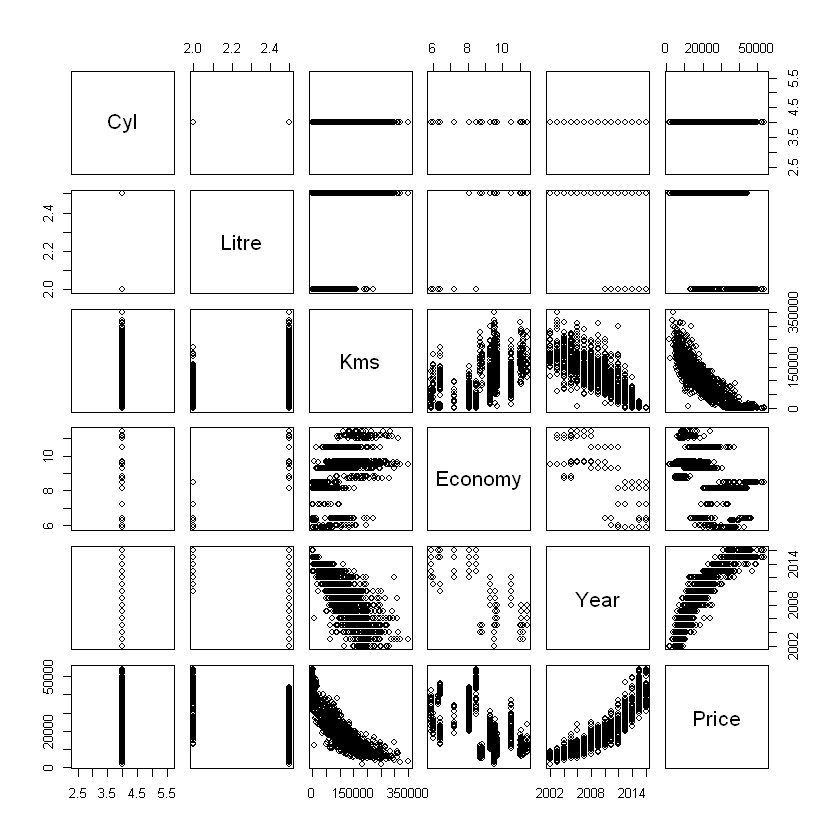

In [7]:
### Correlation between variables #####

### filtering data with numeric variables to run correlation ##
car_num <- Filter(is.numeric, forest_na)

dim(car_num)
cor(car_num)

plot(car_num)

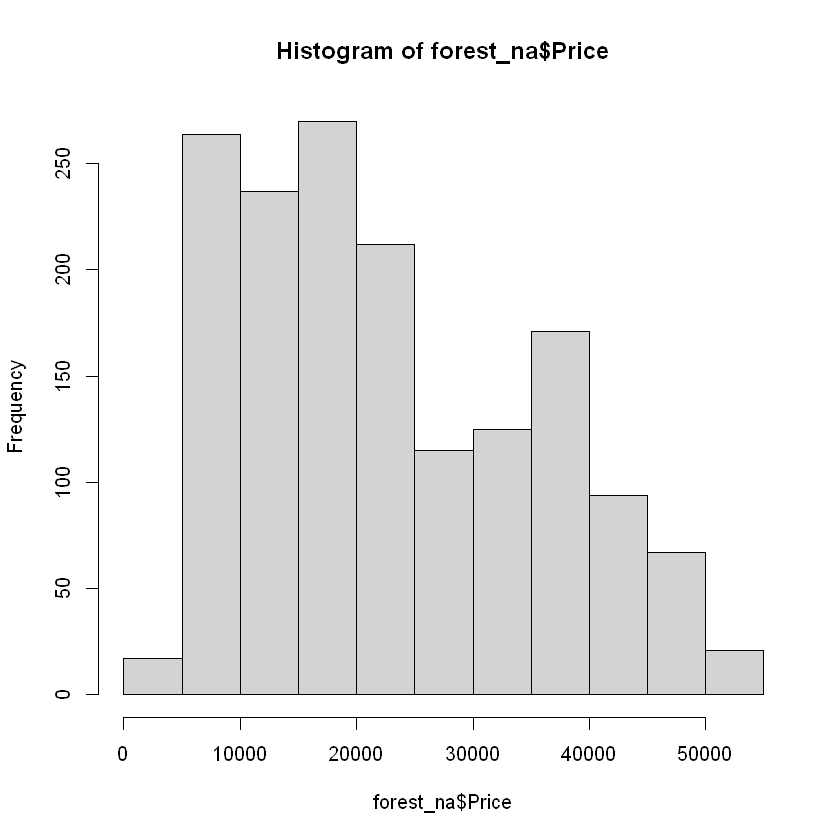

Warning message:
"`qplot()` was deprecated in ggplot2 3.4.0."
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


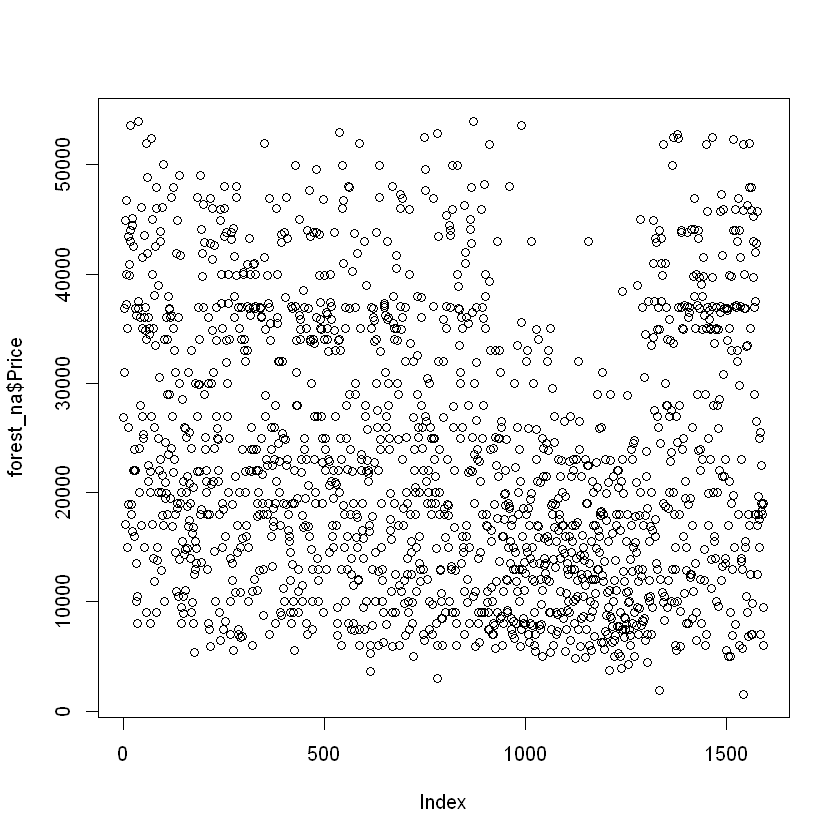

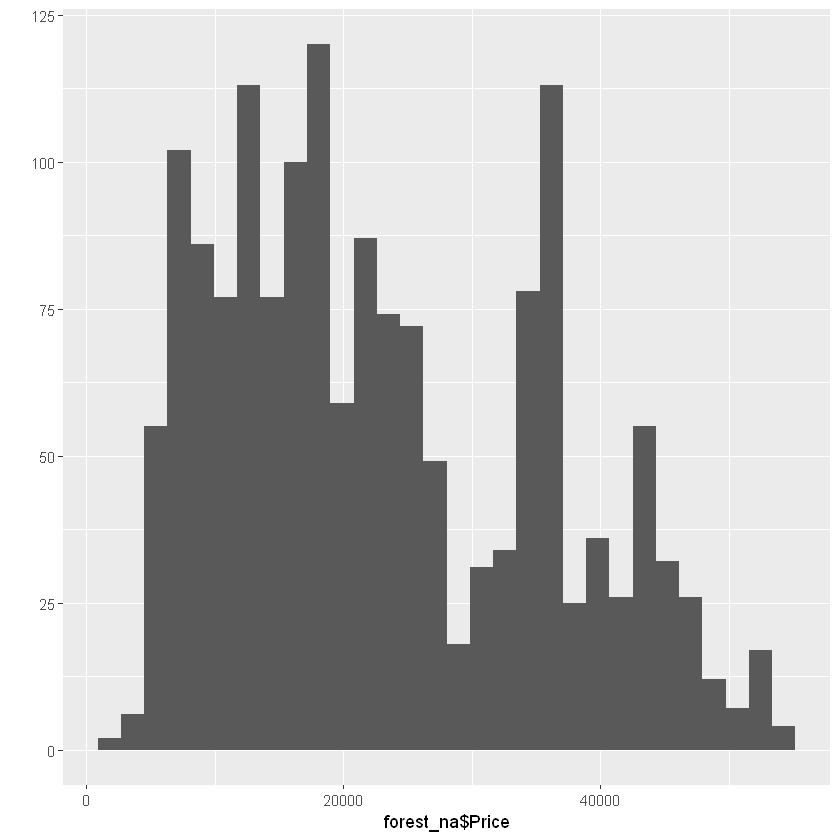

In [8]:
###Analysing price variation in all perspective.
hist(forest_na$Price)
plot(forest_na$Price)
qplot(forest_na$Price)

In [9]:
head(car_num)

,Cyl,Litre,Kms,Economy,Year,Price
,<int>,<dbl>,<int>,<dbl>,<int>,<int>
1,4,2.0,67169,6.0,2011,26888
2,4,2.5,11000,8.1,2015,30999
3,4,2.5,0,8.1,2015,36844
4,4,2.5,81000,9.6,2009,17100
5,4,2.0,9398,8.5,2015,44888
6,4,2.0,0,5.9,2016,37184


In [10]:
# Simple linear regression to evaluate the significance and correlation between variables
lm(Price~., data=car_num)
summary(lm(Price~., data=car_num))
confint(lm(Price~., data=car_num))


Call:
lm(formula = Price ~ ., data = car_num)

Coefficients:
(Intercept)          Cyl        Litre          Kms      Economy         Year  
 -3.555e+06           NA   -1.612e+04   -6.704e-02    1.710e+03    1.795e+03  



Call:
lm(formula = Price ~ ., data = car_num)

Residuals:
     Min       1Q   Median       3Q      Max 
-12501.0  -2744.8   -269.6   2573.5  11748.1 

Coefficients: (1 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.555e+06  1.056e+05  -33.67   <2e-16 ***
Cyl                 NA         NA      NA       NA    
Litre       -1.612e+04  6.714e+02  -24.01   <2e-16 ***
Kms         -6.704e-02  2.638e-03  -25.41   <2e-16 ***
Economy      1.710e+03  1.243e+02   13.75   <2e-16 ***
Year         1.795e+03  5.227e+01   34.34   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3917 on 1588 degrees of freedom
Multiple R-squared:  0.9013,	Adjusted R-squared:  0.901 
F-statistic:  3624 on 4 and 1588 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-3.762528e+06,-3.348323e+06
Cyl,NA,NA
Litre,-1.743717e+04,-1.480351e+04
Kms,-7.221948e-02,-6.187048e-02
Economy,1.465878e+03,1.953506e+03
Year,1.692155e+03,1.897201e+03



Call:
lm(formula = Price ~ Transmission + Cyl + Litre + Kms + Economy + 
    Colour + Year + Fuel + Location + Cat, data = forest_na)

Residuals:
     Min       1Q   Median       3Q      Max 
-10511.7  -1824.0   -167.3   1766.3  10481.5 

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.286e+06  9.752e+04 -23.445  < 2e-16 ***
TransmissionManual          -1.488e+03  2.008e+02  -7.408 2.11e-13 ***
Cyl                                 NA         NA      NA       NA    
Litre                       -4.658e+03  8.786e+02  -5.301 1.32e-07 ***
Kms                         -5.317e-02  2.078e-03 -25.592  < 2e-16 ***
Economy                     -2.362e+03  2.072e+02 -11.398  < 2e-16 ***
ColourBeige                 -2.200e+03  1.866e+03  -1.179  0.23853    
ColourBlack                  1.325e+03  7.838e+02   1.690  0.09117 .  
ColourBlue                   1.008e+03  7.840e+02   1.286  0.19876

1             2             3             4             5 
 6.817366e+01 -3.232436e+02 -1.407246e+03  3.808308e+02  2.127992e+03 
            6             7             8             9            10 
-2.916523e+03  2.748536e+03  5.003105e+02 -1.337864e+03  7.234464e+02 
           11            12            13            14            15 
 1.440193e+03  5.735538e+01  3.407663e+03  4.289914e+03  9.981370e+02 
           16            17            18            19            20 
 7.130287e+03  3.461635e+03  3.810797e+03 -1.158529e+03  1.894707e+03 
           21            22            23            24            25 
 5.621842e+02 -3.047466e+03  4.677967e+03  1.956824e+03 -3.621023e+02 
           26            27            28            29            30 
-1.888727e+03 -4.095698e+03 -3.440396e+03 -2.016533e+03  1.192252e+03 
           31            32            33            34            35 
 2.419397e+02 -2.488897e+03 -1.439592e+03 -2.233559e+03  1.036498e+03 
           36            37            38            39            40 
 7.500287e+03 -6.959061e+02 -1.878236e+03 -7.155827e+02  6.986768e+02 
           41            42            43            44            45 
-2.369560e+03 -1.534070e+03 -7.704559e+02  2.783691e+03 -5.216423e+02 
           46            47            48            49            50 
-1.323932e+02  3.774316e+03  4.555830e+03  1.067428e+03  4.230325e+03 
           51            52            53            54            55 
-3.059210e+03 -3.690440e+02 -3.669644e+03 -3.077188e+03 -4.587217e+03 
           56            57            58            59            60 
 4.222063e+02  3.737756e+03 -5.344197e+03  2.254889e+03  2.838258e+03 
           61            62            63            64            65 
-5.833294e+02 -2.426179e+03 -5.490793e+01 -3.709205e+03 -4.676498e+03 
           66            67            68            69            70 
 3.216391e+03 -1.053416e+02 -9.179996e+02  4.743700e+03 -1.664689e+02 
           71            72            73            74            75 
 3.699113e+03 -7.170573e+03  3.808308e+02  9.520422e+02 -3.916586e+03 
           76            77            78            79            80 
 4.620933e+03 -3.560154e+02 -2.717717e+03  3.448603e+03 -7.126921e+03 
           81            82            83            84            85 
 5.500107e+03  4.945869e+03  1.130570e+03  1.958708e+02 -6.069962e+02 
           86            87            88            89            90 
-3.700385e+02 -9.607038e+02  2.732058e+03 -3.001212e+03  2.335654e+03 
           91            92            93            94            95 
 4.388230e+03  4.206619e+02  4.340324e+03 -4.790466e+03  2.230946e+03 
           96            97            98            99           100 
-2.474253e+02 -2.377118e+03 -1.156629e+03  2.275383e+03 -3.187751e+03 
          101           102           103           104           105 
-3.563913e+03 -2.312012e+03 -1.925141e+02 -8.782638e+02 -2.313063e+02 
          106           107           108           109           110 
-3.638641e+03 -5.756403e+02 -3.932477e+03  1.584741e+03 -4.534996e+03 
          111           112           113           114           115 
-2.606131e+03 -5.820198e+02  2.658071e+02 -1.407246e+03 -8.582251e+02 
          116           117           118           119           120 
-3.324529e+03 -1.713171e+03  3.275150e+01  1.048147e+04 -2.579257e+03 
          121           122           123           124           125 
-4.541658e+02 -9.998704e+02  1.154059e+03  1.419786e+03  1.074842e+03 
          126           127           128           129           130 
-8.059180e+03 -1.635772e+03 -3.232436e+02 -1.516810e+03  5.896204e+02 
          131           132           133           134           135 
 2.681585e+03 -3.233198e+03  2.127992e+03 -4.718874e+03  4.735557e+02 
          136           137           138           139           140 
-1.132382e+03 -3.641455e+03  2.945489e+02 -1.178546e+03  1.967707e+03 
          141           142         

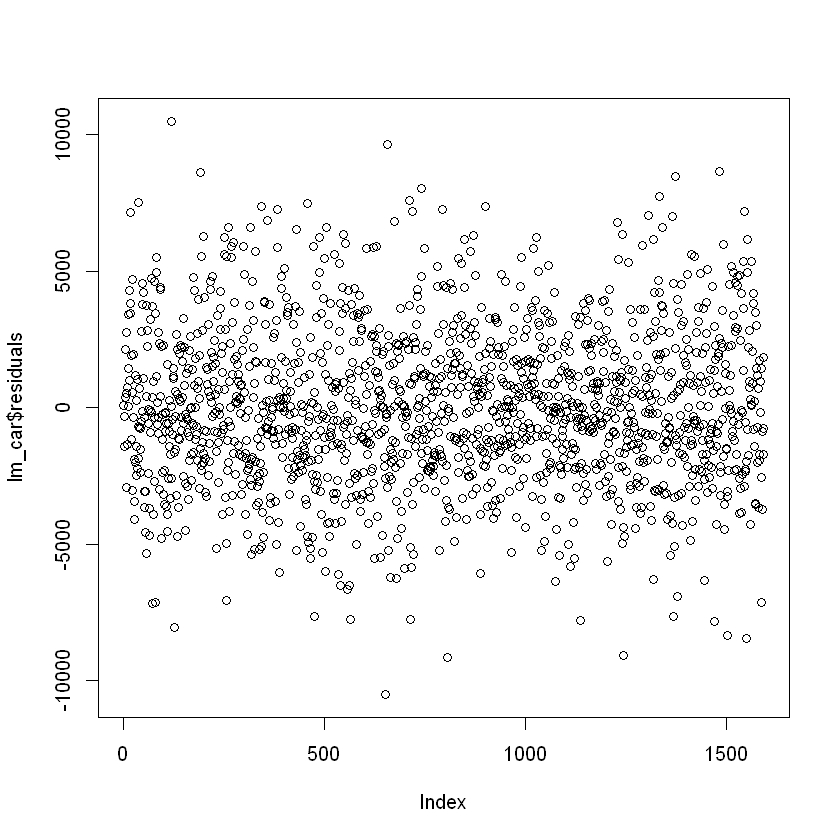

In [11]:
###Applying Linear Model again by taking effective variables.
lm_car <- lm(Price ~ Transmission+Cyl+Litre+Kms+Economy+Colour+Year+Fuel+Location+Cat, data=forest_na )
summary(lm_car)

lm_car$residuals
plot(lm_car$residuals)


Call:
glm(formula = Price ~ Transmission + Cyl + Litre + Kms + Economy + 
    Colour + Year + Fuel + Location + Cat, family = poisson(), 
    data = forest_na)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-62.729  -11.739   -0.447    9.646   76.194  

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                 -1.458e+02  2.928e-01 -497.781  < 2e-16 ***
TransmissionManual          -4.163e-02  5.379e-04  -77.396  < 2e-16 ***
Cyl                                 NA         NA       NA       NA    
Litre                        6.757e-02  1.885e-03   35.855  < 2e-16 ***
Kms                         -3.232e-06  5.977e-09 -540.677  < 2e-16 ***
Economy                     -3.670e-02  5.182e-04  -70.816  < 2e-16 ***
ColourBeige                 -1.249e-01  5.804e-03  -21.514  < 2e-16 ***
ColourBlack                  1.578e-02  1.828e-03    8.636  < 2e-16 ***
ColourBlue           

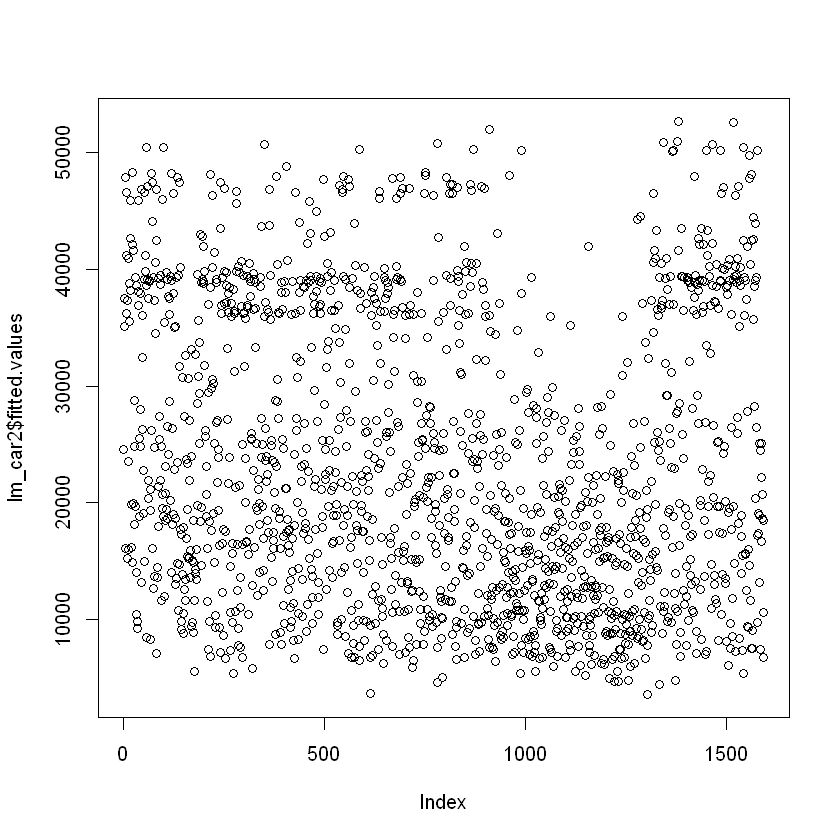

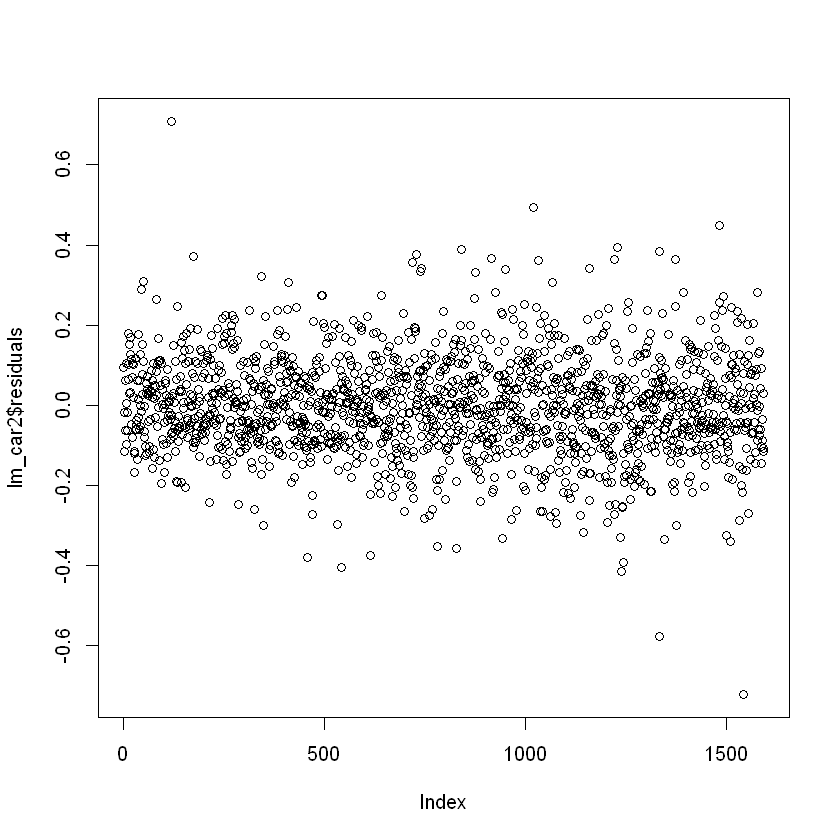

In [12]:
###Poisson Regression model is a Generalized Linear Model (GLM) that is used to model count data and contingency tables 
lm_car2 <- glm(Price ~ Transmission+Cyl+Litre+Kms+Economy+Colour+Year+Fuel+Location+Cat, data=forest_na, family=poisson())
summary(lm_car2)
plot(lm_car2$fitted.values)
plot(lm_car2$residuals)

In [13]:
##### split data test and train #####
head(forest_na)
tail(forest_na)
dim(forest_na)
sample <- sample.int(n = nrow(forest_na), size = floor(.75*nrow(forest_na)), replace = F)
train <- forest_na[sample, ]
test  <- forest_na[-sample, ]

,Transmission,BodyType,Cyl,Litre,Kms,Economy,Make,Model,Badge,Colour,Year,Price,Fuel,Location,Cat,SellerId
,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1,Manual,SUV,4,2.0,67169,6.0,Subaru,Forester,2.0D,Silver,2011,26888,Diesel,VICTORIA,Used,AGC-SELLER-16890
2,Automatic,SUV,4,2.5,11000,8.1,Subaru,Forester,2.5i-L,Ice Silver,2015,30999,Petrol - Unleaded ULP,VICTORIA,Private,SSE-SELLER-2347077
3,Automatic,SUV,4,2.5,0,8.1,Subaru,Forester,2.5i-L,Blue,2015,36844,Petrol - Unleaded ULP,NORTHERN TERRITORY,BNCIS,AGC-SELLER-51471
4,Automatic,SUV,4,2.5,81000,9.6,Subaru,Forester,XS Premium,Newport Blue,2009,17100,Petrol - Unleaded ULP,SOUTH AUSTRALIA,Private,SSE-SELLER-3267502
5,Automatic,SUV,4,2.0,9398,8.5,Subaru,Forester,XT Premium,Black,2015,44888,Petrol - Premium ULP,NEW SOUTH WALES,Used,AGC-SELLER-10988
6,Manual,SUV,4,2.0,0,5.9,Subaru,Forester,2.0D-L,White,2016,37184,Diesel,SOUTH AUSTRALIA,BNCIS,AGC-SELLER-18615


,Transmission,BodyType,Cyl,Litre,Kms,Economy,Make,Model,Badge,Colour,Year,Price,Fuel,Location,Cat,SellerId
,<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>
1698,Automatic,SUV,4,2.5,57800,9.3,Subaru,Forester,X Luxury Edition,Dark Grey,2012,19000,Petrol - Unleaded ULP,QUEENSLAND,Private,SSE-SELLER-3265186
1701,Automatic,SUV,4,2.5,83300,9.6,Subaru,Forester,X Luxury,Obsidian Black Pearl,2010,17990,Petrol - Unleaded ULP,NEW SOUTH WALES,Private,SSE-SELLER-3247644
1704,Manual,SUV,4,2.0,97000,6.4,Subaru,Forester,2.0D,Satin White Pearl,2011,18900,Diesel,NEW SOUTH WALES,Private,SSE-SELLER-3311754
1708,Automatic,SUV,4,2.5,182500,11.1,Subaru,Forester,XT,Beige,2006,9500,Petrol - Premium ULP,VICTORIA,Private,SSE-SELLER-3304241
1710,Manual,SUV,4,2.5,248000,9.6,Subaru,Forester,X,Premium Silver,2006,5990,Petrol - Unleaded ULP,NEW SOUTH WALES,Private,SSE-SELLER-3307093
1711,Manual,SUV,4,2.0,119500,6.4,Subaru,Forester,2.0D,Satin White Pearl,2010,19000,Diesel,VICTORIA,Private,SSE-SELLER-111356


[1] 1593   16


Call:
glm(formula = Price ~ Year + Kms + Fuel + Transmission + Litre + 
    Economy + Colour + Location + Cat, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9772.2  -1749.4    -70.3   1674.3  10487.9  

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -2.194e+06  1.094e+05 -20.055  < 2e-16 ***
Year                         1.120e+03  5.413e+01  20.685  < 2e-16 ***
Kms                         -5.629e-02  2.394e-03 -23.514  < 2e-16 ***
FuelPetrol - Premium ULP     1.223e+04  7.207e+02  16.964  < 2e-16 ***
FuelPetrol - Unleaded ULP    4.348e+03  5.244e+02   8.291 3.17e-16 ***
TransmissionManual          -1.536e+03  2.273e+02  -6.755 2.29e-11 ***
Litre                       -4.136e+03  1.005e+03  -4.115 4.16e-05 ***
Economy                     -2.343e+03  2.368e+02  -9.895  < 2e-16 ***
ColourBeige                 -1.865e+03  2.225e+03  -0.838  0.40200    
ColourBlack                  1.723e

(Intercept)                        Year 
              -2.193764e+06                1.119694e+03 
                        Kms    FuelPetrol - Premium ULP 
              -5.628490e-02                1.222601e+04 
  FuelPetrol - Unleaded ULP          TransmissionManual 
               4.348113e+03               -1.535588e+03 
                      Litre                     Economy 
              -4.136393e+03               -2.343326e+03 
                ColourBeige                 ColourBlack 
              -1.865102e+03                1.722597e+03 
                 ColourBlue                ColourBronze 
               1.157436e+03                1.418564e+03 
             ColourBurgundy    ColourCamellia Red Pearl 
              -1.406425e+03               -6.773064e+02 
   ColourCamillia Red Pearl          ColourCarmelia Red 
               8.381366e+02                5.745069e+02 
       ColourChampagne Gold              ColourCore Red 
               2.791795e+03                1.617231e+03 
 ColourCrystal Black Silica          ColourCrystal Grey 
               2.138428e+03                1.551566e+03 
            ColourDark Grey             ColourDeep Blue 
              -2.050751e+02               -7.043876e+02 
          ColourDeep Cherry             ColourEvergreen 
              -1.463927e+03                9.793250e+01 
           ColourGarnet Red                  ColourGold 
              -9.020075e+02                5.502022e+00 
       ColourGraphite Black                 ColourGreen 
               5.482033e+02                1.282608e+03 
                 ColourGrey                  ColourGREY 
               1.066133e+03               -4.513292e+02 
           ColourIce Silver         ColourJasmine Green 
              -1.545547e+02               -3.707047e+03 
              ColourMagenta     ColourMarine Blue Pearl 
              -7.389582e+02                1.110837e+03 
               ColourMaroon       ColourMaroon/Burgundy 
               1.409669e+02                5.460333e+02 
           ColourMetal Grey         ColourNew Port Blue 
               4.623388e+03                1.382038e+03 
         ColourNewport Blue    ColourNewport Blue Pearl 
               2.419449e+02                3.345197e+03 
 ColourObsidian Black Pearl        ColourPremium Silver 
               9.737404e+02                1.127180e+03 
        ColourPremium White            ColourPure White 
               2.233882e+03                1.879817e+03 
          ColourQuartz Blue                   ColourRed 
               8.403636e+02                5.109195e+02 
             ColourRed Mica            ColourRegal Blue 
               1.149814e+03                2.555640e+03 
         ColourRoyal Silver            ColourSage Green 
               6.427257e+03               -1.559659e+02 
    ColourSatin White Pearl                ColourSilver 
               8.052780e+02                7.967212e+02 
             ColourSky Blue          ColourSpark Silver 
              -3.330891e+01                2.273335e+02 
         ColourSteel Silver ColourSteel Silver Metallic 
               4.546212e+02               -2.083501e+02 
           ColourTopaz Gold                 ColourWhite 
              -2.006683e+03                7.767910e+02 
    LocationNEW SOUTH WALES  LocationNORTHERN TERRITORY 
              -2.752648e+02               -3.150288e+02 
         LocationQUEENSLAND     LocationSOUTH AUSTRALIA 
              -6.098198e+02               -6.643105e+02 
           LocationTASMANIA            LocationVICTORIA 
              -4.278550e+02                2.789354e+02 
  LocationWESTERN AUSTRALIA                     CatDemo 
              -1.214387e+03                6.631955e+01 
                 CatPrivate                     CatUsed 
              -5.566674e+03               -4.504789e+03

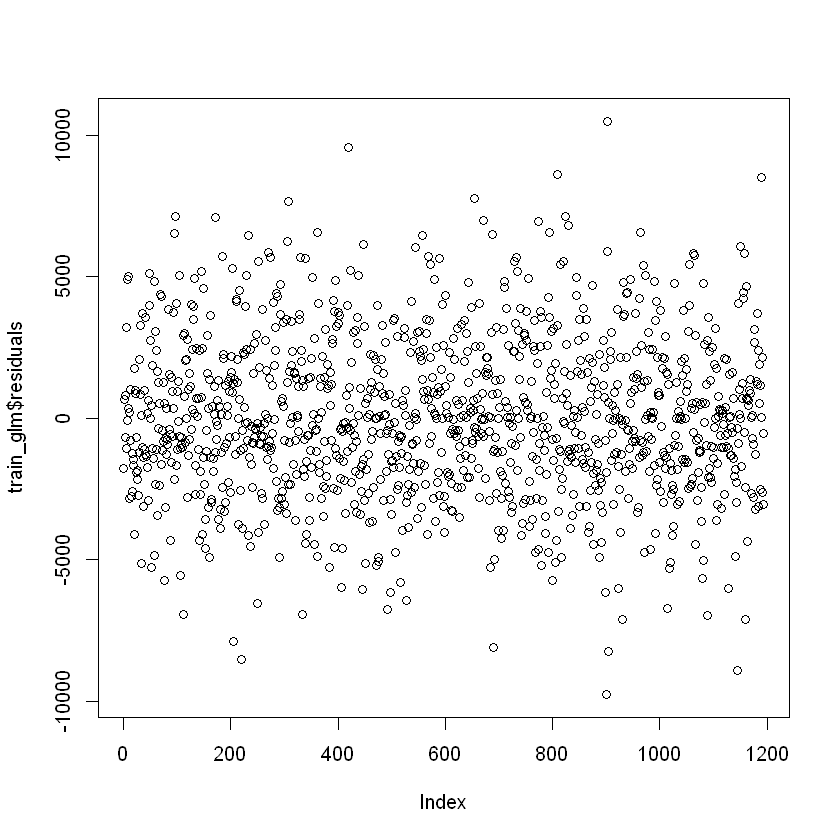

In [14]:
###Implementing generelised liner model on train dataset.
train_glm <- glm(Price~Year+Kms+Fuel+Transmission+Litre+Economy+Colour+Location+Cat, data=train)
summary(train_glm)
plot(train_glm$residuals)
train_glm$coefficients


Call:
glm(formula = Price ~ Year + Kms + Fuel + Transmission + Litre + 
    Economy + Location + Cat, family = gaussian, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9744.7  -1755.6   -188.2   1757.6  10661.4  

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.135e+06  9.970e+04 -21.416  < 2e-16 ***
Year                        1.091e+03  4.931e+01  22.127  < 2e-16 ***
Kms                        -5.524e-02  2.332e-03 -23.683  < 2e-16 ***
FuelPetrol - Premium ULP    1.258e+04  6.993e+02  17.988  < 2e-16 ***
FuelPetrol - Unleaded ULP   4.471e+03  5.140e+02   8.699  < 2e-16 ***
TransmissionManual         -1.620e+03  2.206e+02  -7.343 3.88e-13 ***
Litre                      -3.834e+03  9.900e+02  -3.873 0.000113 ***
Economy                    -2.458e+03  2.285e+02 -10.757  < 2e-16 ***
LocationNEW SOUTH WALES    -3.624e+02  5.470e+02  -0.662 0.507816    
LocationNORTHERN TERRITORY -5.746e+

(Intercept)                       Year 
             -2.135132e+06               1.091208e+03 
                       Kms   FuelPetrol - Premium ULP 
             -5.523959e-02               1.258014e+04 
 FuelPetrol - Unleaded ULP         TransmissionManual 
              4.470918e+03              -1.620148e+03 
                     Litre                    Economy 
             -3.834338e+03              -2.457947e+03 
   LocationNEW SOUTH WALES LocationNORTHERN TERRITORY 
             -3.623544e+02              -5.746167e+02 
        LocationQUEENSLAND    LocationSOUTH AUSTRALIA 
             -7.216800e+02              -7.943107e+02 
          LocationTASMANIA           LocationVICTORIA 
             -4.649585e+02               1.116394e+02 
 LocationWESTERN AUSTRALIA                    CatDemo 
             -1.417649e+03              -3.990967e+00 
                CatPrivate                    CatUsed 
             -6.027585e+03              -4.812495e+03

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-2.330540e+06,-1.939723e+06
Year,9.945533e+02,1.187864e+03
Kms,-5.981113e-02,-5.066804e-02
FuelPetrol - Premium ULP,1.120945e+04,1.395083e+04
FuelPetrol - Unleaded ULP,3.463561e+03,5.478275e+03
TransmissionManual,-2.052578e+03,-1.187719e+03
Litre,-5.774645e+03,-1.894031e+03
Economy,-2.905779e+03,-2.010115e+03
LocationNEW SOUTH WALES,-1.434447e+03,7.097382e+02
LocationNORTHERN TERRITORY,-2.950356e+03,1.801122e+03


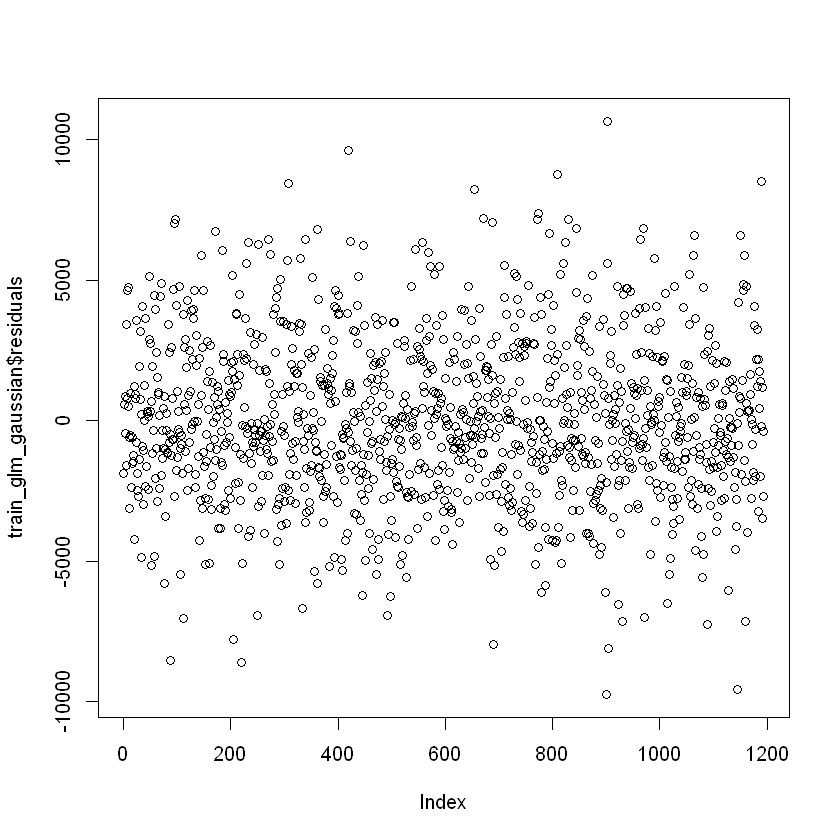

In [15]:
###Implementing generelised liner model on train dataset using Gaussian distribution.
train_glm_gaussian <- glm(Price~Year+Kms+Fuel+Transmission+Litre+Economy+Location+Cat, data=train, family = gaussian)
summary(train_glm_gaussian)
plot(train_glm_gaussian$residuals)
train_glm_gaussian$coefficients
confint(train_glm_gaussian)

In [16]:
### predicting price with GLM and LM models and testing model performance.

predict(train_glm_gaussian,newdata=data.frame(test)[1:10, ], type="response", se.fit=T) 

predict_glm <- predict(train_glm_gaussian, test)

$fit
       8       16       18       20       23       25       26       27 
46945.81 46254.49 39820.84 15573.23 40550.25 23155.02 24629.81 27643.96 
      29       30 
38998.02 20777.01 

$se.fit
       8       16       18       20       23       25       26       27 
403.2003 444.0503 472.1981 283.5487 445.7858 245.2542 319.2327 582.0570 
      29       30 
295.3505 299.4469 

$residual.scale
[1] 2870.489

In [17]:
### calcualte MSE (Mean square error of the model)
mean((train$Price - predict(train_glm_gaussian))^2)
mean(train_glm_gaussian$residuals ^ 2)
mean(train_glm$residuals ^ 2)

[1] 8115490

[1] 8115490

[1] 7712532

Moving forward with the Test dataset 

In [18]:
######Reading Car_data data set in csv file and checking the dimensions###
car_data <- read.csv("C:/Users/Sarthak/OneDrive/Desktop/DMML/Dataset 2/Cardata.csv", header = T, stringsAsFactors = T)

head(car_data)
tail(car_data)
dim(car_data)

,Index,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<int>,<fct>,<int>
1,2,8560,22-06-2017,RS,Hatch,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,134944,Manual,2009
2,3,17074,22-06-2017,2.0i,Hatch,Used,Silver,4,6.8,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,33304,Automatic,2014
3,4,8526,22-06-2017,R,Hatch,Used,Blue,4,8.9,Unleaded,22-06-2017,2.0,6,Subaru,Impreza,81668,Manual,2007
4,5,10952,22-06-2017,R,Hatch,Used,Black,4,8.8,Unleaded,22-06-2017,2.0,8,Subaru,Impreza,48051,Automatic,2009
5,6,33964,22-06-2017,WRX STI,Sedan,Used,Grey,4,10.5,Unleaded,22-06-2017,2.5,3,Subaru,Impreza,51516,Manual,2011
6,8,18070,22-06-2017,2.0i-S,Hatch,Used,Black,4,6.8,Unleaded,22-06-2017,2.0,7,Subaru,Impreza,60294,Automatic,2012


,Index,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year
,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<int>,<fct>,<int>
38501,53450,31946,21-06-2017,2.5i-S Lineartronic AWD,Suv,,Grey,NA,NA,Unleaded,21-06-2017,NA,1,Subaru,Forester,38576,Automatic,2013
38502,53452,38036,21-06-2017,2.5i-S CVT AWD,Suv,,Silver,NA,NA,Unleaded,21-06-2017,NA,1,Subaru,Forester,29128,Automatic,2016
38503,53453,39913,21-06-2017,2.5i-S CVT AWD,Suv,,White,NA,NA,Unleaded,21-06-2017,NA,1,Subaru,Forester,8334,Automatic,2015
38504,53455,6061,22-06-2017,,Hatch,,Silver,NA,NA,,27-06-2017,NA,1,Subaru,Impreza,108,Manual,2006
38505,53456,13980,22-06-2017,RS (AWD) LTD ED,Hatch,,Blue,NA,NA,Unleaded,27-06-2017,NA,1,Subaru,Impreza,98799,Manual,2010
38506,53459,27952,22-06-2017,2.5i LUXURY LIMITED EDITION,Wagon,,Grey,NA,NA,Unleaded,27-06-2017,NA,1,Subaru,Forester,65236,Automatic,2014


[1] 38506    18

In [19]:
#counting total number of NAs in the dataset.
sum(is.na(car_data))

[1] 10449

In [20]:
#### Removing unnecessary columns from dataset such as 'rownum'.
cols_to_be_removed=c("rownum")
car_data = car_data[,!(names(car_data) %in% cols_to_be_removed) ]

#### counting NAs by each columns ####
sapply(car_data, function(x) sum(is.na(x)))

Index            price acquisition_date            badge 
               0                3                0                0 
       body_type         category           colour        cylinders 
               0                0                0             2488 
         economy             fuel     last_updated           litres 
            3920                0                0             2488 
        location             make            model         odometer 
               0                0                0             1550 
    transmission             year 
               0                0

In [21]:
summary(car_data)

     Index           price            acquisition_date     badge      
 Min.   :    2   Min.   :      33   16-09-2017: 2876   GX     : 4707  
 1st Qu.:13413   1st Qu.:   12045   09-03-2018: 1862   WRX    : 2390  
 Median :26765   Median :   21065   21-11-2017: 1657   2.5i-L : 2374  
 Mean   :26760   Mean   :   22170   07-08-2017: 1643   Cruiser: 2213  
 3rd Qu.:40116   3rd Qu.:   29595   14-12-2017: 1523   X      : 2097  
 Max.   :53459   Max.   :12345760   17-02-2018: 1451   CV     : 2046  
                 NA's   :3          (Other)   :27494   (Other):22679  
   body_type        category         colour       cylinders    
 SUV    :24489          : 2488   White  :9649   Min.   :4.000  
 Hatch  : 6872   Demo   : 1686   Silver :8188   1st Qu.:4.000  
 Sedan  : 5448   Other  : 4037   Grey   :5669   Median :4.000  
 Suv    : 1079   Other2 : 1514   Blue   :4482   Mean   :4.014  
 Wagon  :  604   Private:11417   Black  :3888   3rd Qu.:4.000  
 Coup   :    8   Used   :17364   Red    :2329   

In [22]:
###Two Coloumns 'acquisition_date' and 'last_updated' have same values.
car_data1 <- car_data
car_data1[ ,c("acquisition_date", "last_updated")] <- lapply(car_data1[ ,c("acquisition_date", "last_updated")], as.Date, format = "%d-%m-%Y")

In [23]:
str(car_data1$last_updated)

 Date[1:38506], format: "2017-06-22" "2017-06-22" "2017-06-22" "2017-06-22" "2017-06-22" ...


# Explanatory Analysis

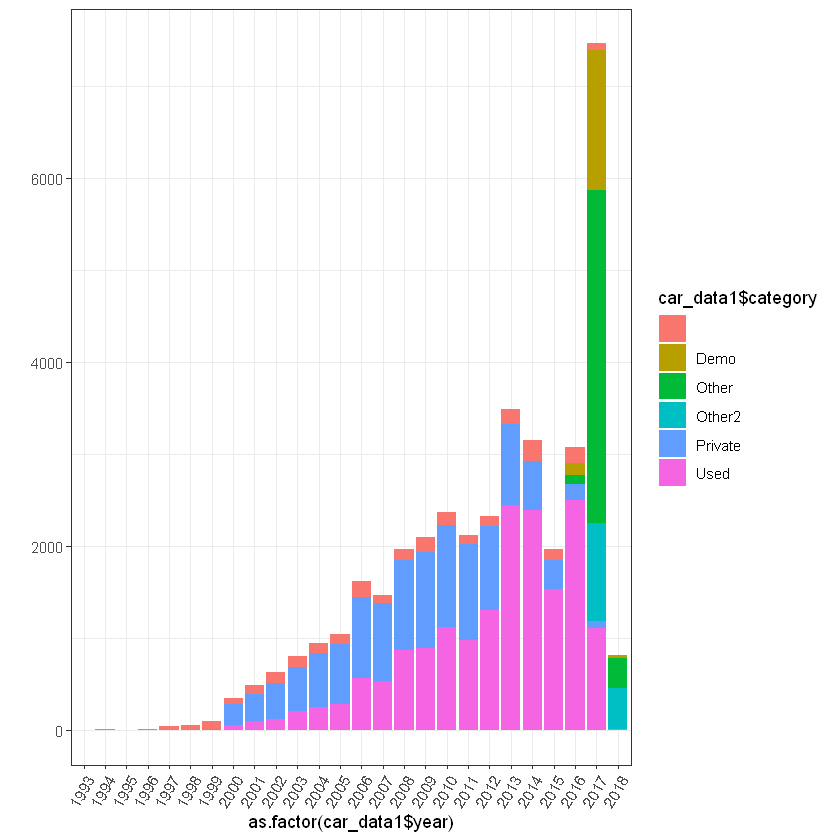

In [24]:
#### Visualize and plot the car catogories by years ####
qplot(as.factor(car_data1$year), fill = car_data1$category) + theme_bw()  +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

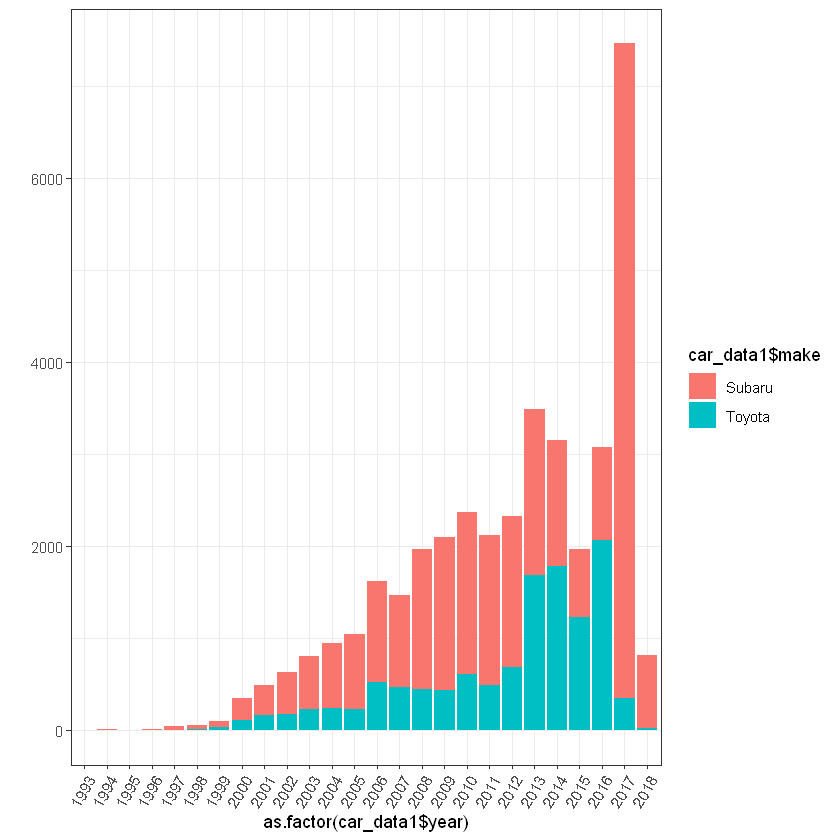

In [25]:
qplot(as.factor(car_data1$year), fill = car_data1$make) + theme_bw()  +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

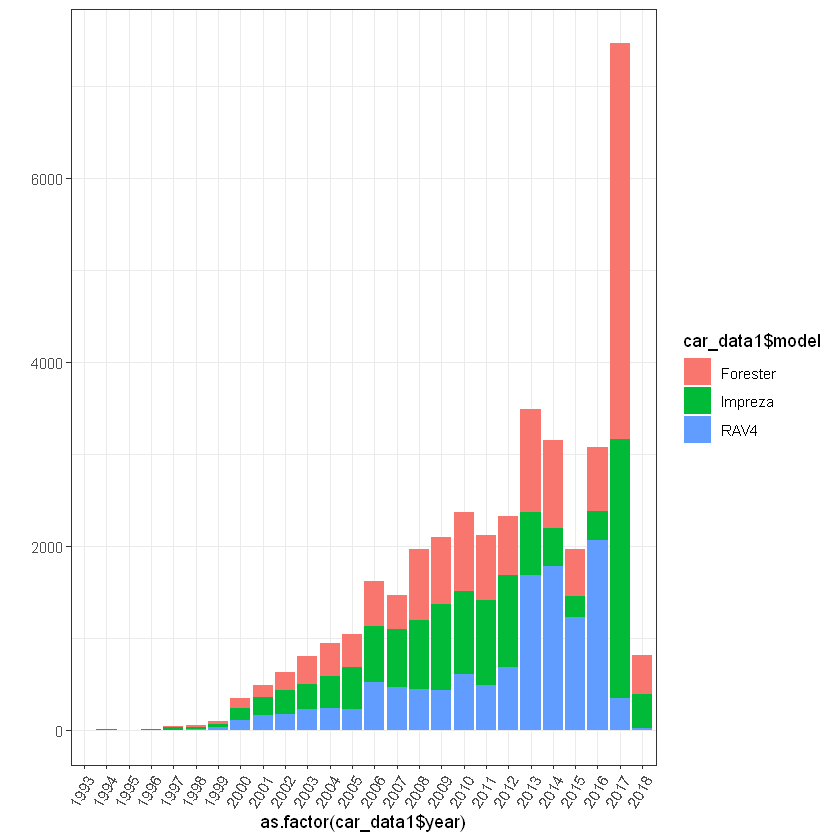

In [26]:
qplot(as.factor(car_data1$year), fill = car_data1$model) + theme_bw()  +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

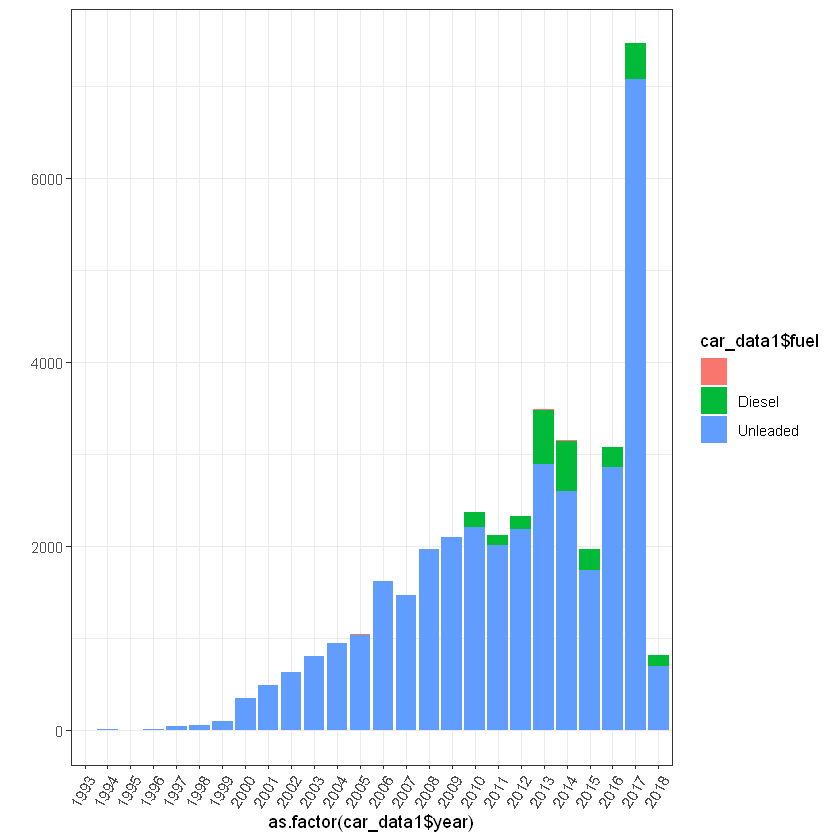

In [27]:
qplot(as.factor(car_data1$year), fill = car_data1$fuel) + theme_bw()  +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

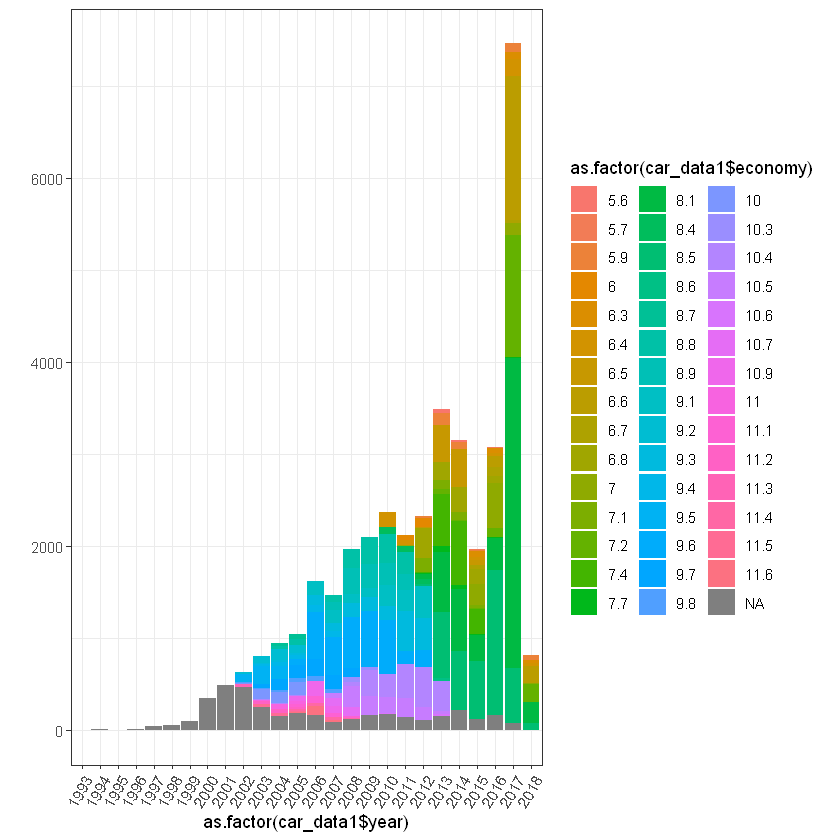

In [28]:
qplot(as.factor(car_data1$year), fill = as.factor(car_data1$economy)) + theme_bw()  +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

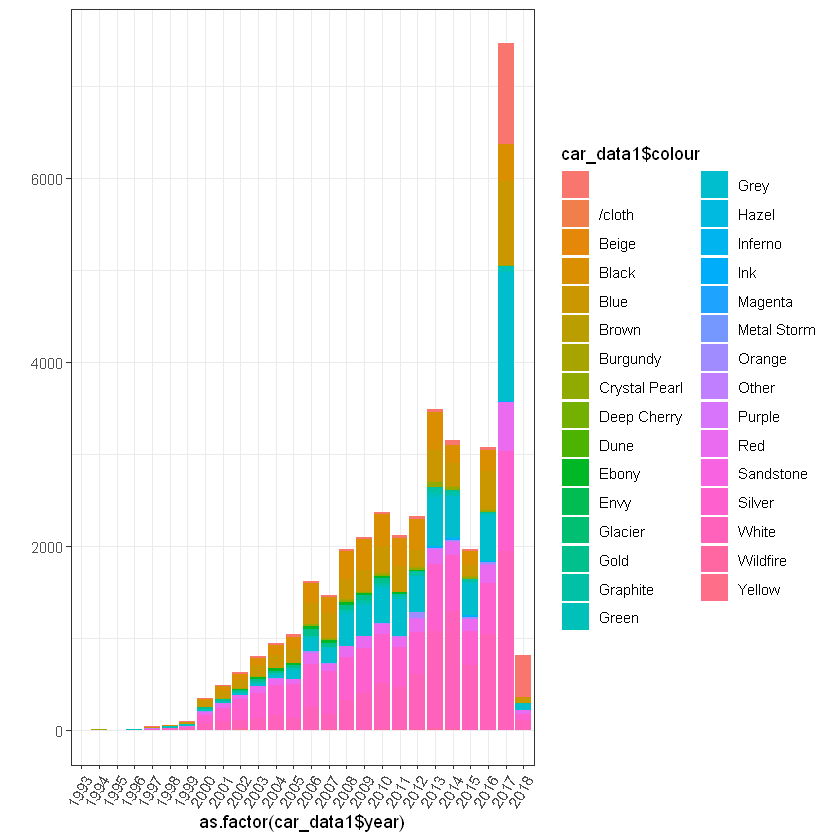

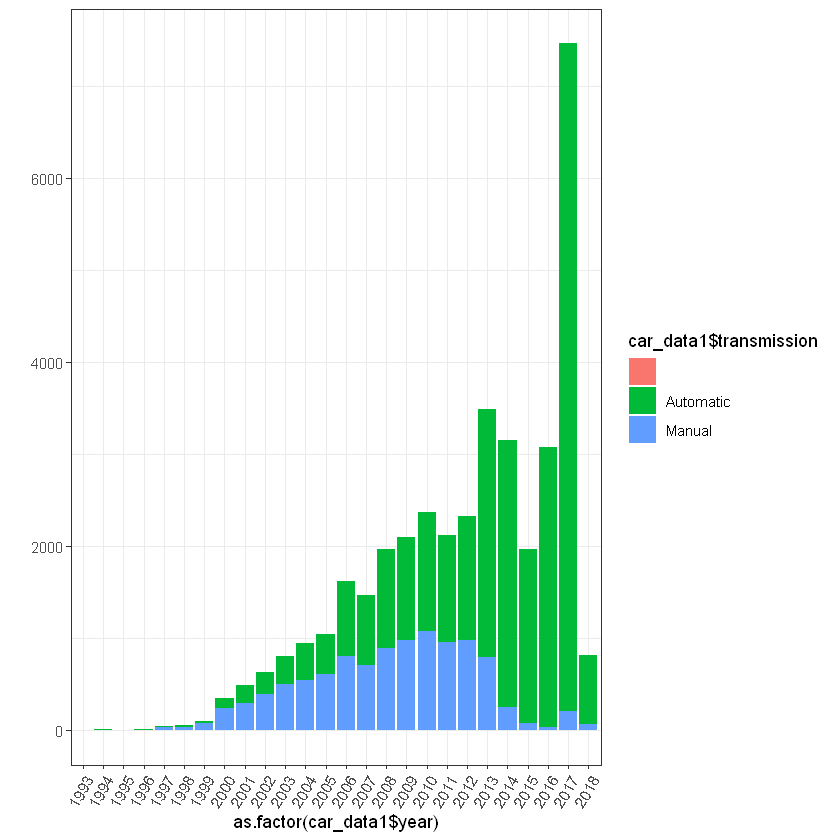

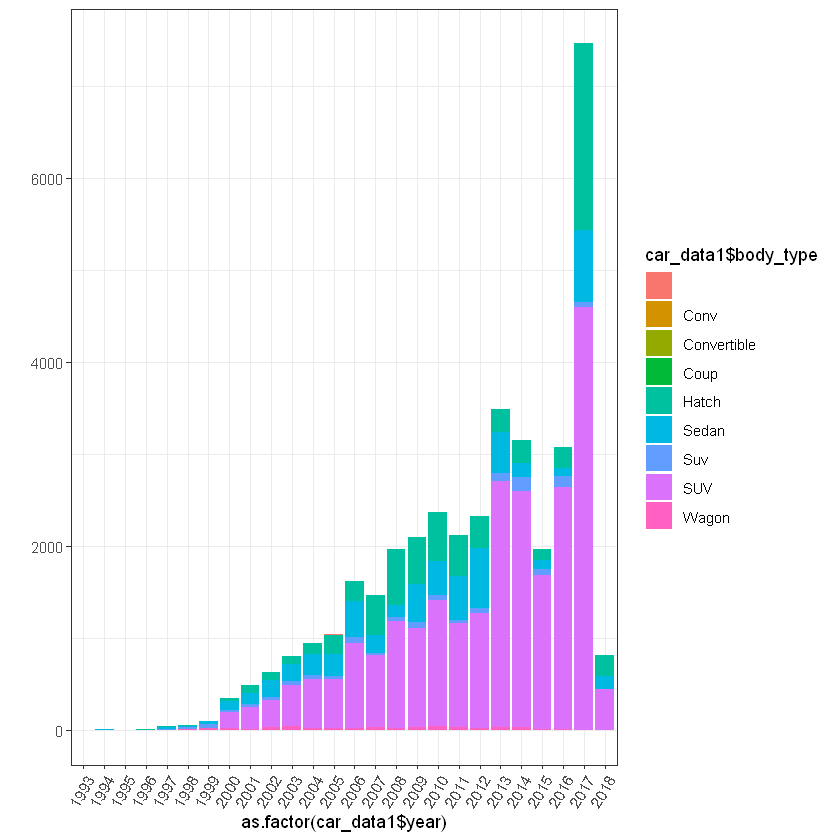

In [29]:
qplot(as.factor(car_data1$year), fill = car_data1$colour) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

qplot(as.factor(car_data1$year), fill = car_data1$transmission) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

qplot(as.factor(car_data1$year), fill = car_data1$body_type) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))

In [30]:
toyota <- car_data1[ which(car_data1$make == "Toyota"),] 
subaru <- car_data1[ which(car_data1$make == "Subaru"),]

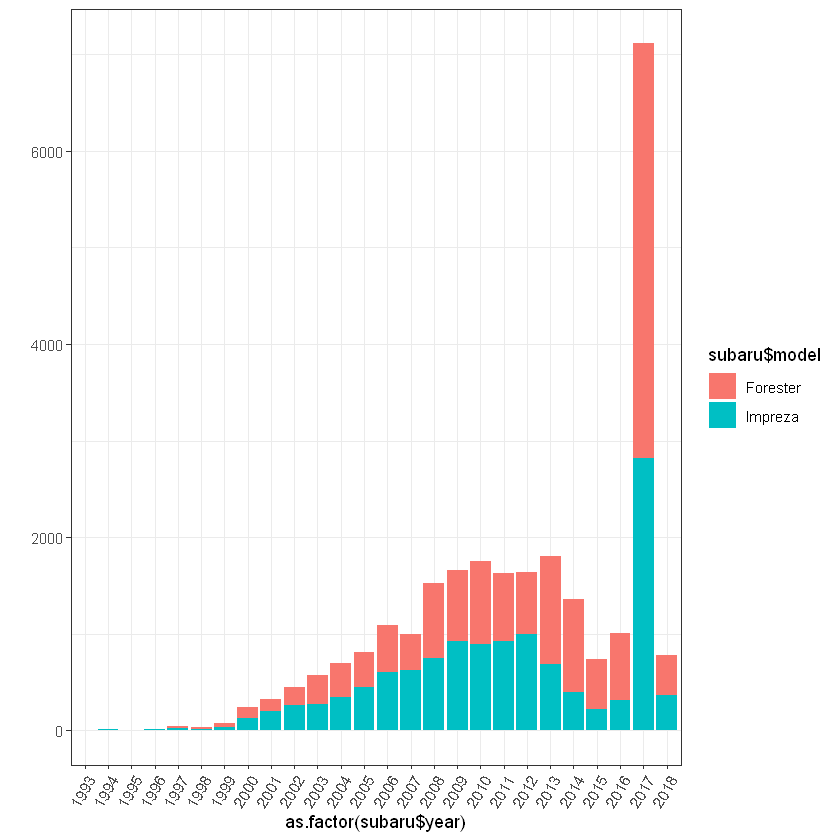

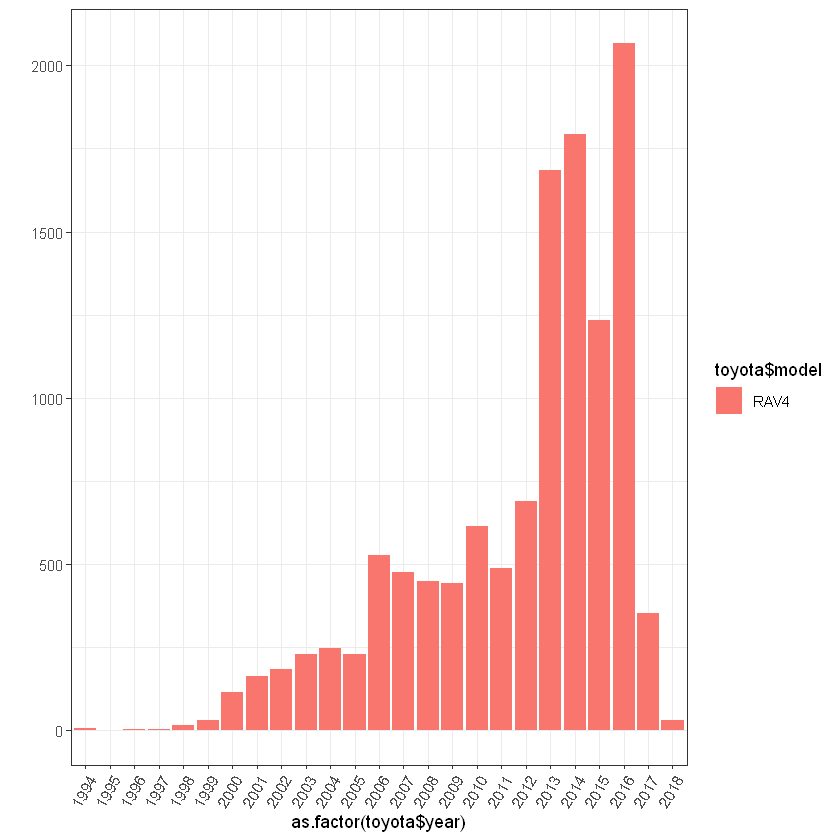

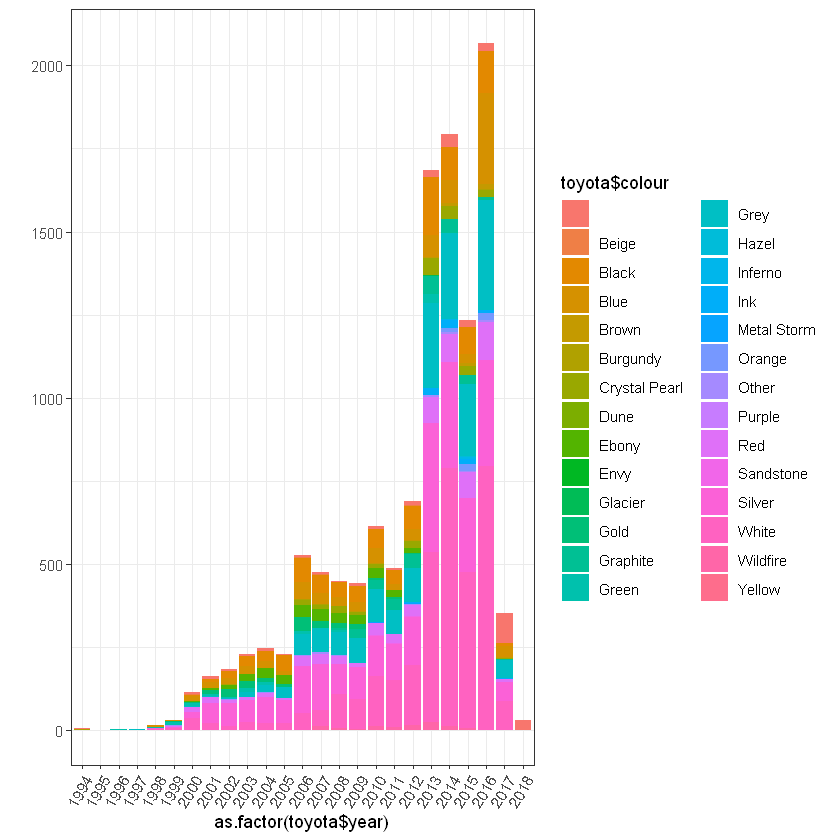

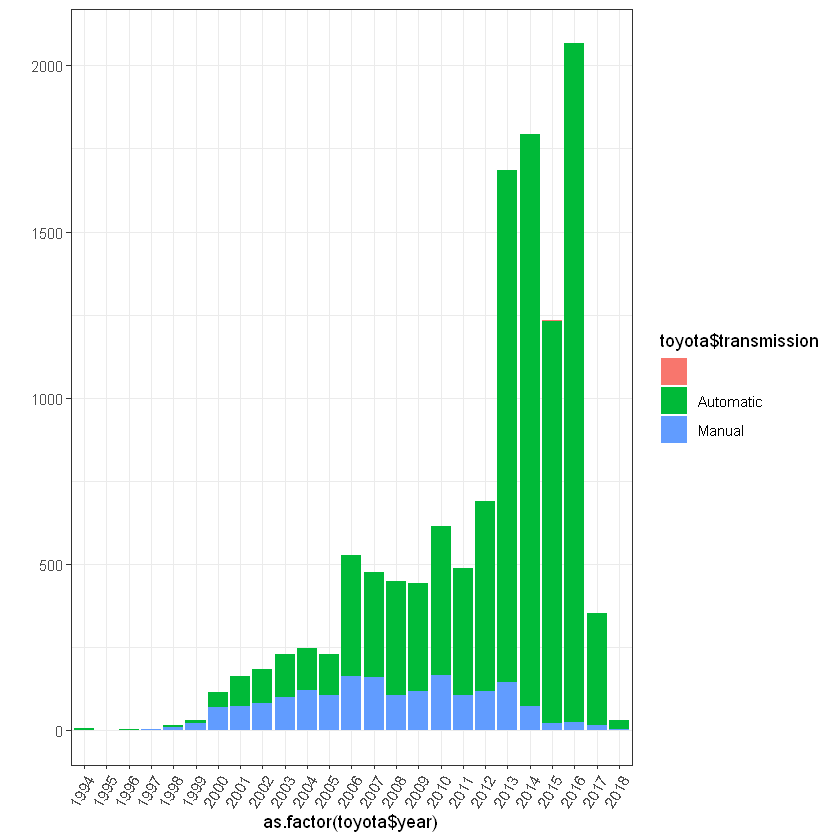

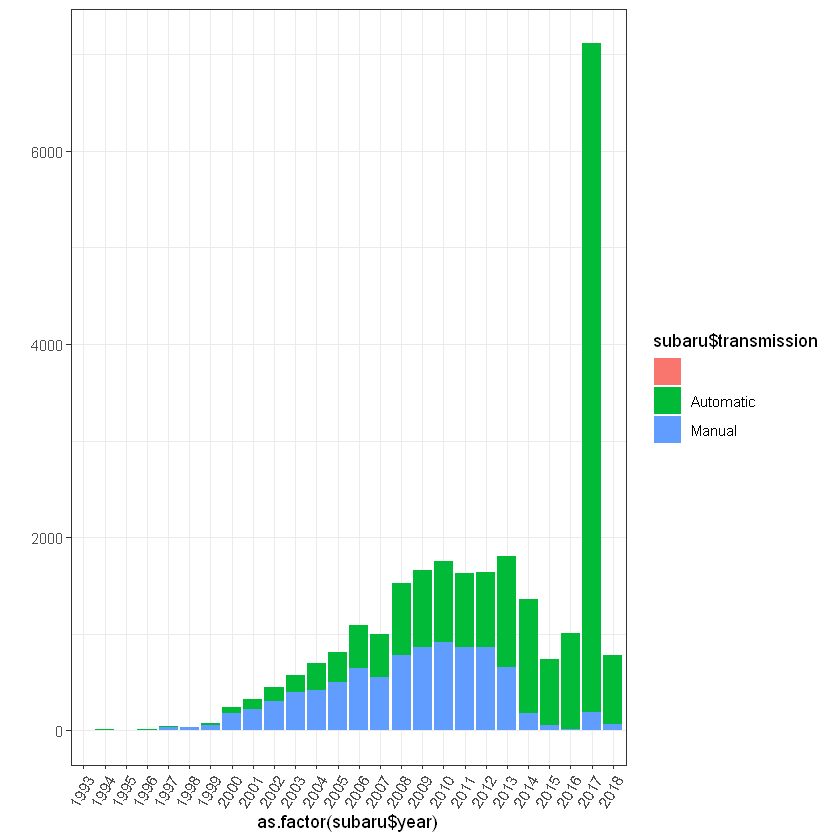

In [31]:
qplot(as.factor(subaru$year), fill = subaru$model) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))
qplot(as.factor(toyota$year), fill = toyota$model) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))
qplot(as.factor(toyota$year), fill = toyota$colour) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1)) +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))
qplot(as.factor(toyota$year), fill = toyota$transmission) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))
qplot(as.factor(subaru$year), fill = subaru$transmission) + theme_bw() +
            theme(axis.text.x = element_text(angle = 60, hjust = 1))


In [32]:
sapply(car_data1, function(y) sum(length(which(is.na(y)))))

Index            price acquisition_date            badge 
               0                3                0                0 
       body_type         category           colour        cylinders 
               0                0                0             2488 
         economy             fuel     last_updated           litres 
            3920                0                0             2488 
        location             make            model         odometer 
               0                0                0             1550 
    transmission             year 
               0                0

In [33]:
#### Removing unnecessary columns from dataset such as 'Index' and removing the NA values using omit
#### function.
cols_to_be_removed=c("Index")
car_data1 = car_data[,!(names(car_data) %in% cols_to_be_removed) ]

car_data1_noNA <- na.omit(car_data1)
dim(car_data1_noNA)
sum(is.na(car_data1_noNA))

[1] 33072    17

[1] 0

In [34]:
str(car_data1_noNA)
summary(car_data1_noNA)

'data.frame':	33072 obs. of  17 variables:
 $ price           : int  8560 17074 8526 10952 33964 18070 12019 10860 12997 30216 ...
 $ acquisition_date: Factor w/ 106 levels "01-02-2018","01-03-2018",..: 74 74 74 74 74 74 74 74 74 74 ...
 $ badge           : Factor w/ 205 levels "","(4x4)","(No Badge)",..: 104 11 98 98 155 16 104 98 104 25 ...
 $ body_type       : Factor w/ 9 levels "","Conv","Convertible",..: 5 5 5 5 6 5 6 6 6 5 ...
 $ category        : Factor w/ 6 levels "","Demo","Other",..: 6 6 6 6 6 6 6 5 6 3 ...
 $ colour          : Factor w/ 31 levels "","/cloth","Beige",..: 28 28 5 4 17 4 17 26 28 26 ...
 $ cylinders       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ economy         : num  8.9 6.8 8.9 8.8 10.5 6.8 8.9 8.8 8.9 6.6 ...
 $ fuel            : Factor w/ 3 levels "","Diesel","Unleaded": 3 3 3 3 3 3 3 3 3 3 ...
 $ last_updated    : Factor w/ 104 levels "01-02-2018","01-03-2018",..: 73 73 73 73 73 73 73 73 73 73 ...
 $ litres          : num  2 2 2 2 2.5 2 2 2 2 2 ...
 $ location   

     price          acquisition_date     badge             body_type    
 Min.   :   828   16-09-2017: 2542   GX     : 4470   SUV        :22785  
 1st Qu.: 13046   21-11-2017: 1597   2.5i-L : 2302   Hatch      : 5884  
 Median : 22009   14-12-2017: 1474   WRX    : 2153   Sedan      : 4403  
 Mean   : 22138   07-08-2017: 1462   CV     : 2040              :    0  
 3rd Qu.: 29453   17-02-2018: 1390   X      : 1935   Conv       :    0  
 Max.   :450610   15-10-2017: 1316   Cruiser: 1842   Convertible:    0  
                  (Other)   :23291   (Other):18330   (Other)    :    0  
    category         colour       cylinders        economy      
        :    0   White  :8845   Min.   :4.000   Min.   : 5.600  
 Demo   : 1686   Silver :7140   1st Qu.:4.000   1st Qu.: 7.400  
 Other  : 4037   Grey   :5379   Median :4.000   Median : 8.500  
 Other2 :    0   Blue   :3990   Mean   :4.016   Mean   : 8.523  
 Private:10388   Black  :3509   3rd Qu.:4.000   3rd Qu.: 9.600  
 Used   :16961   Red    :2

In [35]:
car_data2 <- car_data1_noNA[ which(car_data1_noNA$price <= 100000),]
dim(car_data2)
summary(car_data2)

[1] 33068    17

     price         acquisition_date     badge             body_type    
 Min.   :  828   16-09-2017: 2542   GX     : 4470   SUV        :22784  
 1st Qu.:13046   21-11-2017: 1597   2.5i-L : 2302   Hatch      : 5881  
 Median :22009   14-12-2017: 1474   WRX    : 2153   Sedan      : 4403  
 Mean   :22106   07-08-2017: 1462   CV     : 2040              :    0  
 3rd Qu.:29416   17-02-2018: 1390   X      : 1935   Conv       :    0  
 Max.   :55077   15-10-2017: 1316   Cruiser: 1842   Convertible:    0  
                 (Other)   :23287   (Other):18326   (Other)    :    0  
    category         colour       cylinders        economy      
        :    0   White  :8845   Min.   :4.000   Min.   : 5.600  
 Demo   : 1686   Silver :7139   1st Qu.:4.000   1st Qu.: 7.400  
 Other  : 4035   Grey   :5378   Median :4.000   Median : 8.500  
 Other2 :    0   Blue   :3989   Mean   :4.016   Mean   : 8.523  
 Private:10387   Black  :3508   3rd Qu.:4.000   3rd Qu.: 9.600  
 Used   :16960   Red    :2053   Ma

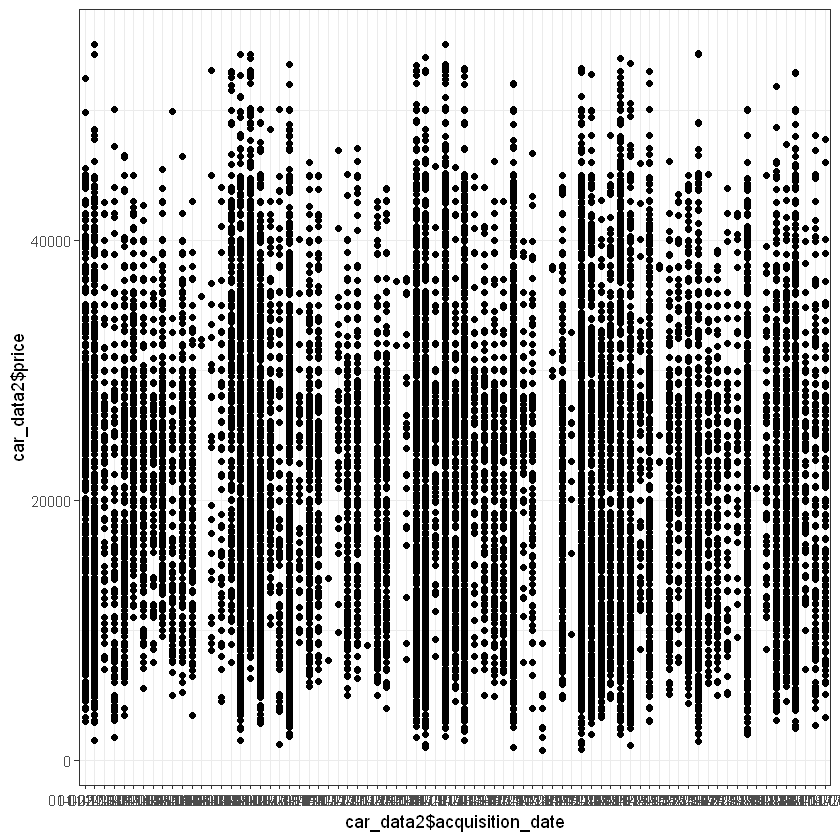

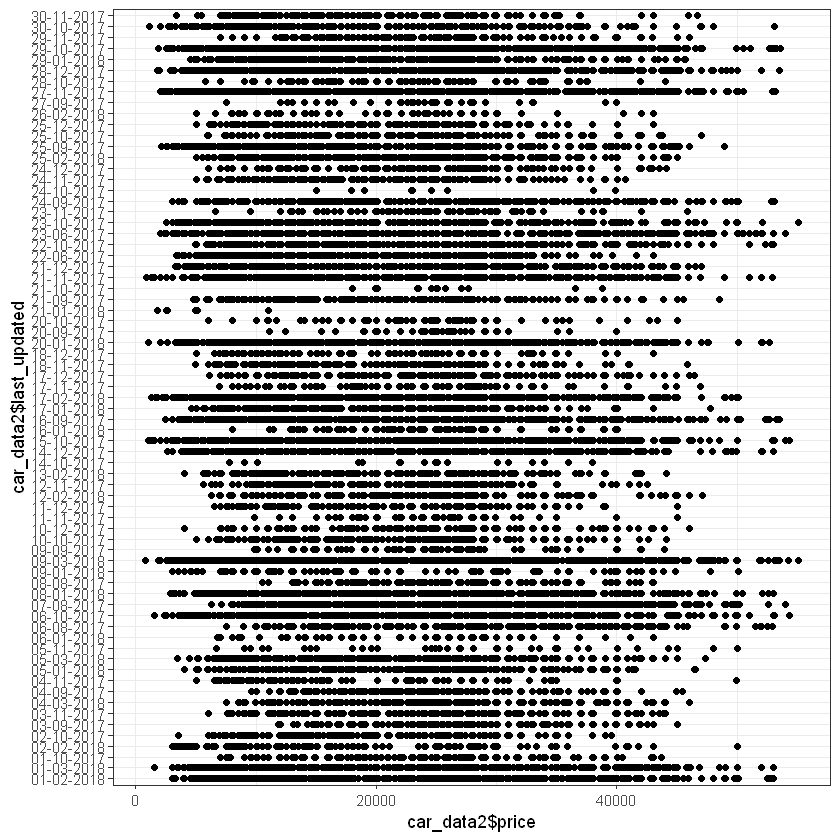

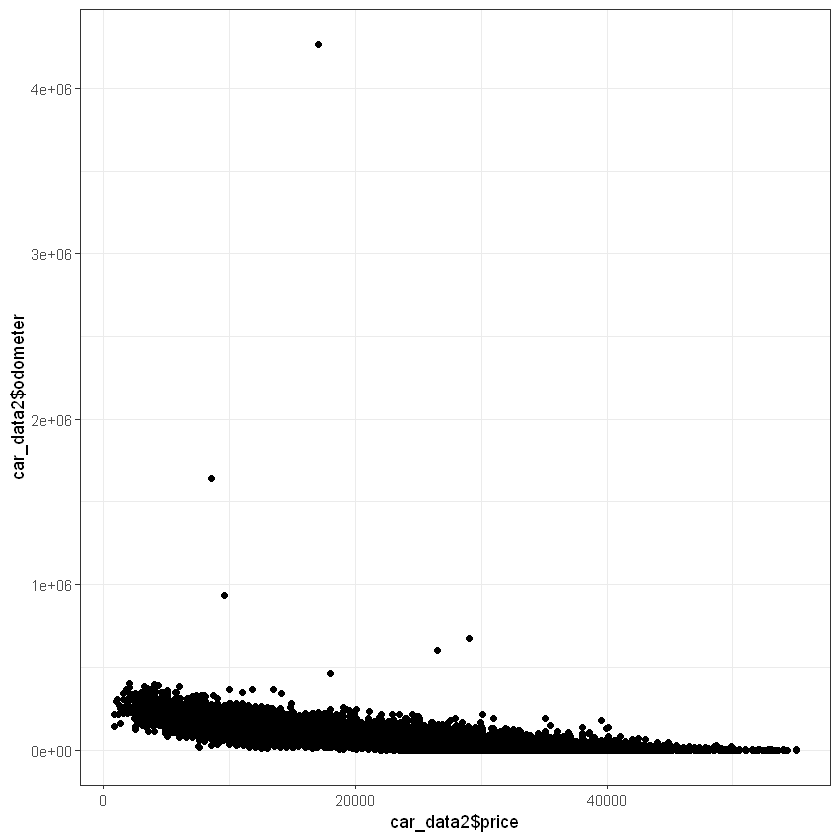

In [36]:
qplot(car_data2$acquisition_date, car_data2$price) + theme_bw()
qplot(car_data2$price, car_data2$last_updated) + theme_bw()
qplot(car_data2$price, car_data2$odometer) + theme_bw()

In [37]:
dim(car_data2)
#403009
car_data3 <- car_data2[ which(car_data2$odometer <= 403009),]
dim(car_data3)
summary(car_data3)

[1] 33068    17

[1] 33062    17

     price         acquisition_date     badge             body_type    
 Min.   :  828   16-09-2017: 2541   GX     : 4469   SUV        :22781  
 1st Qu.:13046   21-11-2017: 1597   2.5i-L : 2302   Hatch      : 5880  
 Median :22009   14-12-2017: 1473   WRX    : 2153   Sedan      : 4401  
 Mean   :22107   07-08-2017: 1462   CV     : 2039              :    0  
 3rd Qu.:29439   17-02-2018: 1390   X      : 1935   Conv       :    0  
 Max.   :55077   15-10-2017: 1315   Cruiser: 1841   Convertible:    0  
                 (Other)   :23284   (Other):18323   (Other)    :    0  
    category         colour       cylinders        economy      
        :    0   White  :8844   Min.   :4.000   Min.   : 5.600  
 Demo   : 1686   Silver :7137   1st Qu.:4.000   1st Qu.: 7.400  
 Other  : 4035   Grey   :5377   Median :4.000   Median : 8.500  
 Other2 :    0   Blue   :3988   Mean   :4.016   Mean   : 8.523  
 Private:10386   Black  :3508   3rd Qu.:4.000   3rd Qu.: 9.600  
 Used   :16955   Red    :2052   Ma

In [38]:
### dmy function is used to change the date format.
car_data3$year1 <- dmy(sprintf("03-09-%d",car_data3$year))
str(car_data3)

'data.frame':	33062 obs. of  18 variables:
 $ price           : int  8560 17074 8526 10952 33964 18070 12019 10860 12997 30216 ...
 $ acquisition_date: Factor w/ 106 levels "01-02-2018","01-03-2018",..: 74 74 74 74 74 74 74 74 74 74 ...
 $ badge           : Factor w/ 205 levels "","(4x4)","(No Badge)",..: 104 11 98 98 155 16 104 98 104 25 ...
 $ body_type       : Factor w/ 9 levels "","Conv","Convertible",..: 5 5 5 5 6 5 6 6 6 5 ...
 $ category        : Factor w/ 6 levels "","Demo","Other",..: 6 6 6 6 6 6 6 5 6 3 ...
 $ colour          : Factor w/ 31 levels "","/cloth","Beige",..: 28 28 5 4 17 4 17 26 28 26 ...
 $ cylinders       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ economy         : num  8.9 6.8 8.9 8.8 10.5 6.8 8.9 8.8 8.9 6.6 ...
 $ fuel            : Factor w/ 3 levels "","Diesel","Unleaded": 3 3 3 3 3 3 3 3 3 3 ...
 $ last_updated    : Factor w/ 104 levels "01-02-2018","01-03-2018",..: 73 73 73 73 73 73 73 73 73 73 ...
 $ litres          : num  2 2 2 2 2.5 2 2 2 2 2 ...
 $ location   

In [39]:
### Changing the format of the Year1 column to calculate the age of a car ###
car_data3$year1 <- format(car_data3$year1, "%d-%m-%Y")
car_data3$year1

[1] "03-09-2009" "03-09-2014" "03-09-2007" "03-09-2009" "03-09-2011"
    [6] "03-09-2012" "03-09-2009" "03-09-2011" "03-09-2008" "03-09-2017"
   [11] "03-09-2017" "03-09-2017" "03-09-2017" "03-09-2013" "03-09-2017"
   [16] "03-09-2010" "03-09-2010" "03-09-2009" "03-09-2017" "03-09-2017"
   [21] "03-09-2010" "03-09-2012" "03-09-2008" "03-09-2012" "03-09-2017"
   [26] "03-09-2008" "03-09-2014" "03-09-2014" "03-09-2015" "03-09-2012"
   [31] "03-09-2010" "03-09-2017" "03-09-2017" "03-09-2006" "03-09-2009"
   [36] "03-09-2017" "03-09-2017" "03-09-2013" "03-09-2008" "03-09-2017"
   [41] "03-09-2012" "03-09-2013" "03-09-2009" "03-09-2010" "03-09-2012"
   [46] "03-09-2017" "03-09-2017" "03-09-2011" "03-09-2017" "03-09-2012"
   [51] "03-09-2016" "03-09-2014" "03-09-2016" "03-09-2012" "03-09-2011"
   [56] "03-09-2017" "03-09-2017" "03-09-2017" "03-09-2016" "03-09-2011"
   [61] "03-09-2012" "03-09-2012" "03-09-2012" "03-09-2012" "03-09-2007"
   [66] "03-09-2008" "03-09-2017" "03-09-2003" "03-09-2007" "03-09-2008"
   [71] "03-09-2017" "03-09-2007" "03-09-2012" "03-09-2012" "03-09-2009"
   [76] "03-09-2012" "03-09-2012" "03-09-2017" "03-09-2012" "03-09-2007"
   [81] "03-09-2014" "03-09-2016" "03-09-2011" "03-09-2017" "03-09-2017"
   [86] "03-09-2017" "03-09-2012" "03-09-2012" "03-09-2017" "03-09-2012"
   [91] "03-09-2006" "03-09-2013" "03-09-2015" "03-09-2017" "03-09-2009"
   [96] "03-09-2013" "03-09-2017" "03-09-2011" "03-09-2003" "03-09-2010"
  [101] "03-09-2006" "03-09-2010" "03-09-2008" "03-09-2009" "03-09-2011"
  [106] "03-09-2006" "03-09-2009" "03-09-2010" "03-09-2014" "03-09-2004"
  [111] "03-09-2011" "03-09-2007" "03-09-2014" "03-09-2009" "03-09-2011"
  [116] "03-09-2014" "03-09-2017" "03-09-2013" "03-09-2008" "03-09-2010"
  [121] "03-09-2010" "03-09-2009" "03-09-2016" "03-09-2012" "03-09-2004"
  [126] "03-09-2017" "03-09-2015" "03-09-2010" "03-09-2011" "03-09-2010"
  [131] "03-09-2012" "03-09-2007" "03-09-2009" "03-09-2016" "03-09-2012"
  [136] "03-09-2017" "03-09-2012" "03-09-2012" "03-09-2012" "03-09-2017"
  [141] "03-09-2004" "03-09-2012" "03-09-2006" "03-09-2015" "03-09-2017"
  [146] "03-09-2014" "03-09-2012" "03-09-2013" "03-09-2017" "03-09-2009"
  [151] "03-09-2006" "03-09-2010" "03-09-2017" "03-09-2017" "03-09-2010"
  [156] "03-09-2012" "03-09-2003" "03-09-2017" "03-09-2016" "03-09-2012"
  [161] "03-09-2009" "03-09-2012" "03-09-2010" "03-09-2017" "03-09-2014"
  [166] "03-09-2006" "03-09-2011" "03-09-2009" "03-09-2011" "03-09-2009"
  [171] "03-09-2012" "03-09-2007" "03-09-2007" "03-09-2003" "03-09-2011"
  [176] "03-09-2015" "03-09-2007" "03-09-2012" "03-09-2017" "03-09-2013"
  [181] "03-09-2012" "03-09-2017" "03-09-2012" "03-09-2005" "03-09-2017"
  [186] "03-09-2017" "03-09-2012" "03-09-2015" "03-09-2009" "03-09-2013"
  [191] "03-09-2017" "03-09-2003" "03-09-2011" "03-09-2005" "03-09-2008"
  [196] "03-09-2012" "03-09-2013" "03-09-2017" "03-09-2011" "03-09-2010"
  [201] "03-09-2017" "03-09-2017" "03-09-2006" "03-09-2005" "03-09-2017"
  [206] "03-09-2008" "03-09-2004" "03-09-2009" "03-09-2009" "03-09-2006"
  [211] "03-09-2017" "03-09-2008" "03-09-2017" "03-09-2009" "03-09-2009"
  [216] "03-09-2017" "03-09-2013" "03-09-2006" "03-09-2012" "03-09-2011"
  [221] "03-09-2007" "03-09-2013" "03-09-2007" "03-09-2008" "03-09-2017"
  [226] "03-09-2009" "03-09-2012" "03-09-2008" "03-09-2006" "03-09-2004"
  [231] "03-09-2006" "03-09-2014" "03-09-2008" "03-09-2010" "03-09-2017"
  [236] "03-09-2012" "03-09-2003" "03-09-2013" "03-09-2009" "03-09-2017"
  [241] "03-09-2010" "03-09-2012" "03-09-2017" "03-09-2010" "03-09-2011"
  [246] "03-09-2011" "03-09-2011" "03-09-2008" "03-09-2008" "03-09-2008"
  [251] "03-09-2012" "03-09-2012" "03-09-2006" "03-09-2015" "03-09-2011"
  [256] "03-09-2013" "03-09-2006" "03-09-2004" "03-09-2008" "03-09-2016"
  [261] "03-09-2010" "03-09-2008" "03-09-2016" "03-09-2007" "03-09-2008"
  [266] "03-09-2009" "03-09-2006" "03-09-2017" "03-09-2012" "03-09-2012"
  [271] "03-09-2016" "03-09-2010" "03-09-2015" "03-09-2003" "0

In [40]:
#car_data3$age <- as.POSIXct((car_data3$acquisition_date - car_data3$year1))
#head(car_data3)
car_data3$age <- difftime(car_data3$acquisition_date, car_data3$year1, units="hours")
car_data3$age <- (car_data3$age/21915)
head(car_data3)

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year,year1,age
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<chr>,<drtn>
1,8560,22-06-2017,RS,Hatch,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,134944,Manual,2009,03-09-2009,7.499521 hours
2,17074,22-06-2017,2.0i,Hatch,Used,Silver,4,6.8,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,33304,Automatic,2014,03-09-2014,7.499521 hours
3,8526,22-06-2017,R,Hatch,Used,Blue,4,8.9,Unleaded,22-06-2017,2.0,6,Subaru,Impreza,81668,Manual,2007,03-09-2007,7.499521 hours
4,10952,22-06-2017,R,Hatch,Used,Black,4,8.8,Unleaded,22-06-2017,2.0,8,Subaru,Impreza,48051,Automatic,2009,03-09-2009,7.499521 hours
5,33964,22-06-2017,WRX STI,Sedan,Used,Grey,4,10.5,Unleaded,22-06-2017,2.5,3,Subaru,Impreza,51516,Manual,2011,03-09-2011,7.499521 hours
6,18070,22-06-2017,2.0i-S,Hatch,Used,Black,4,6.8,Unleaded,22-06-2017,2.0,7,Subaru,Impreza,60294,Automatic,2012,03-09-2012,7.499521 hours


In [41]:
### change the output to 2 decimals ###
car_data3$age <- as.numeric(car_data3$age)
car_data3$age <- format(round(car_data3$age, 2), nsmall = 2)
head(car_data3)

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year,year1,age
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<chr>,<chr>
1,8560,22-06-2017,RS,Hatch,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,134944,Manual,2009,03-09-2009,7.50
2,17074,22-06-2017,2.0i,Hatch,Used,Silver,4,6.8,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,33304,Automatic,2014,03-09-2014,7.50
3,8526,22-06-2017,R,Hatch,Used,Blue,4,8.9,Unleaded,22-06-2017,2.0,6,Subaru,Impreza,81668,Manual,2007,03-09-2007,7.50
4,10952,22-06-2017,R,Hatch,Used,Black,4,8.8,Unleaded,22-06-2017,2.0,8,Subaru,Impreza,48051,Automatic,2009,03-09-2009,7.50
5,33964,22-06-2017,WRX STI,Sedan,Used,Grey,4,10.5,Unleaded,22-06-2017,2.5,3,Subaru,Impreza,51516,Manual,2011,03-09-2011,7.50
6,18070,22-06-2017,2.0i-S,Hatch,Used,Black,4,6.8,Unleaded,22-06-2017,2.0,7,Subaru,Impreza,60294,Automatic,2012,03-09-2012,7.50


In [42]:
### Converting odometer and age column into numeric.###
car_data3$age <- as.numeric(car_data3$age)
car_data3$odometer <- as.numeric(car_data3$odometer)
str(car_data3)

'data.frame':	33062 obs. of  19 variables:
 $ price           : int  8560 17074 8526 10952 33964 18070 12019 10860 12997 30216 ...
 $ acquisition_date: Factor w/ 106 levels "01-02-2018","01-03-2018",..: 74 74 74 74 74 74 74 74 74 74 ...
 $ badge           : Factor w/ 205 levels "","(4x4)","(No Badge)",..: 104 11 98 98 155 16 104 98 104 25 ...
 $ body_type       : Factor w/ 9 levels "","Conv","Convertible",..: 5 5 5 5 6 5 6 6 6 5 ...
 $ category        : Factor w/ 6 levels "","Demo","Other",..: 6 6 6 6 6 6 6 5 6 3 ...
 $ colour          : Factor w/ 31 levels "","/cloth","Beige",..: 28 28 5 4 17 4 17 26 28 26 ...
 $ cylinders       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ economy         : num  8.9 6.8 8.9 8.8 10.5 6.8 8.9 8.8 8.9 6.6 ...
 $ fuel            : Factor w/ 3 levels "","Diesel","Unleaded": 3 3 3 3 3 3 3 3 3 3 ...
 $ last_updated    : Factor w/ 104 levels "01-02-2018","01-03-2018",..: 73 73 73 73 73 73 73 73 73 73 ...
 $ litres          : num  2 2 2 2 2.5 2 2 2 2 2 ...
 $ location   

In [43]:
### calcualte average years milage use

car_data3$avg_yearly_usage <- (car_data3$odometer/car_data3$age)

head(car_data3)
str(car_data3)

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year,year1,age,avg_yearly_usage
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>
1,8560,22-06-2017,RS,Hatch,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,134944,Manual,2009,03-09-2009,7.5,17992.533
2,17074,22-06-2017,2.0i,Hatch,Used,Silver,4,6.8,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,33304,Automatic,2014,03-09-2014,7.5,4440.533
3,8526,22-06-2017,R,Hatch,Used,Blue,4,8.9,Unleaded,22-06-2017,2.0,6,Subaru,Impreza,81668,Manual,2007,03-09-2007,7.5,10889.067
4,10952,22-06-2017,R,Hatch,Used,Black,4,8.8,Unleaded,22-06-2017,2.0,8,Subaru,Impreza,48051,Automatic,2009,03-09-2009,7.5,6406.800
5,33964,22-06-2017,WRX STI,Sedan,Used,Grey,4,10.5,Unleaded,22-06-2017,2.5,3,Subaru,Impreza,51516,Manual,2011,03-09-2011,7.5,6868.800
6,18070,22-06-2017,2.0i-S,Hatch,Used,Black,4,6.8,Unleaded,22-06-2017,2.0,7,Subaru,Impreza,60294,Automatic,2012,03-09-2012,7.5,8039.200


'data.frame':	33062 obs. of  20 variables:
 $ price           : int  8560 17074 8526 10952 33964 18070 12019 10860 12997 30216 ...
 $ acquisition_date: Factor w/ 106 levels "01-02-2018","01-03-2018",..: 74 74 74 74 74 74 74 74 74 74 ...
 $ badge           : Factor w/ 205 levels "","(4x4)","(No Badge)",..: 104 11 98 98 155 16 104 98 104 25 ...
 $ body_type       : Factor w/ 9 levels "","Conv","Convertible",..: 5 5 5 5 6 5 6 6 6 5 ...
 $ category        : Factor w/ 6 levels "","Demo","Other",..: 6 6 6 6 6 6 6 5 6 3 ...
 $ colour          : Factor w/ 31 levels "","/cloth","Beige",..: 28 28 5 4 17 4 17 26 28 26 ...
 $ cylinders       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ economy         : num  8.9 6.8 8.9 8.8 10.5 6.8 8.9 8.8 8.9 6.6 ...
 $ fuel            : Factor w/ 3 levels "","Diesel","Unleaded": 3 3 3 3 3 3 3 3 3 3 ...
 $ last_updated    : Factor w/ 104 levels "01-02-2018","01-03-2018",..: 73 73 73 73 73 73 73 73 73 73 ...
 $ litres          : num  2 2 2 2 2.5 2 2 2 2 2 ...
 $ location   

In [44]:
#### rounding the data to zero ####

car_data3$avg_yearly_usage <- round(car_data3$avg_yearly_usage, digits = 0)
car_data3

,price,acquisition_date,badge,body_type,category,colour,cylinders,economy,fuel,last_updated,litres,location,make,model,odometer,transmission,year,year1,age,avg_yearly_usage
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<fct>,<fct>,<dbl>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<chr>,<dbl>,<dbl>
1,8560,22-06-2017,RS,Hatch,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,134944,Manual,2009,03-09-2009,7.5,17993
2,17074,22-06-2017,2.0i,Hatch,Used,Silver,4,6.8,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,33304,Automatic,2014,03-09-2014,7.5,4441
3,8526,22-06-2017,R,Hatch,Used,Blue,4,8.9,Unleaded,22-06-2017,2.0,6,Subaru,Impreza,81668,Manual,2007,03-09-2007,7.5,10889
4,10952,22-06-2017,R,Hatch,Used,Black,4,8.8,Unleaded,22-06-2017,2.0,8,Subaru,Impreza,48051,Automatic,2009,03-09-2009,7.5,6407
5,33964,22-06-2017,WRX STI,Sedan,Used,Grey,4,10.5,Unleaded,22-06-2017,2.5,3,Subaru,Impreza,51516,Manual,2011,03-09-2011,7.5,6869
6,18070,22-06-2017,2.0i-S,Hatch,Used,Black,4,6.8,Unleaded,22-06-2017,2.0,7,Subaru,Impreza,60294,Automatic,2012,03-09-2012,7.5,8039
7,12019,22-06-2017,RS,Sedan,Used,Grey,4,8.9,Unleaded,22-06-2017,2.0,3,Subaru,Impreza,96160,Manual,2009,03-09-2009,7.5,12821
8,10860,22-06-2017,R,Sedan,Private,Red,4,8.8,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,103380,Automatic,2011,03-09-2011,7.5,13784
9,12997,22-06-2017,RS,Sedan,Used,Silver,4,8.9,Unleaded,22-06-2017,2.0,2,Subaru,Impreza,88631,Manual,2008,03-09-2008,7.5,11817


In [45]:
## separating variables based on numberic and factors. ###
#install.packages("corrgram")
library(corrgram)
dim(car_data3)
numericVars <- which(sapply(car_data3, is.numeric)) #index vector numeric variables
factorVars <- which(sapply(car_data3, is.factor)) #index vector factor variables
cat('There are', length(numericVars), 'numeric variables, and', length(factorVars), 'categoric variables')

Warning message:
"package 'corrgram' was built under R version 4.2.2"


[1] 33062    20

There are 9 numeric variables, and 10 categoric variables

In [46]:
###  Building corelation matrix for all numeric variables ###

all_numericVariable <- car_data3[, numericVars]
cor_numVar <- cor(all_numericVariable, use="pairwise.complete.obs")

In [47]:
#sort on decreasing correlations with price
cor_sorted <- as.matrix(sort(cor_numVar[,'price'], decreasing = TRUE))
#select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

Warning message:
"package 'corrplot' was built under R version 4.2.2"
corrplot 0.92 loaded



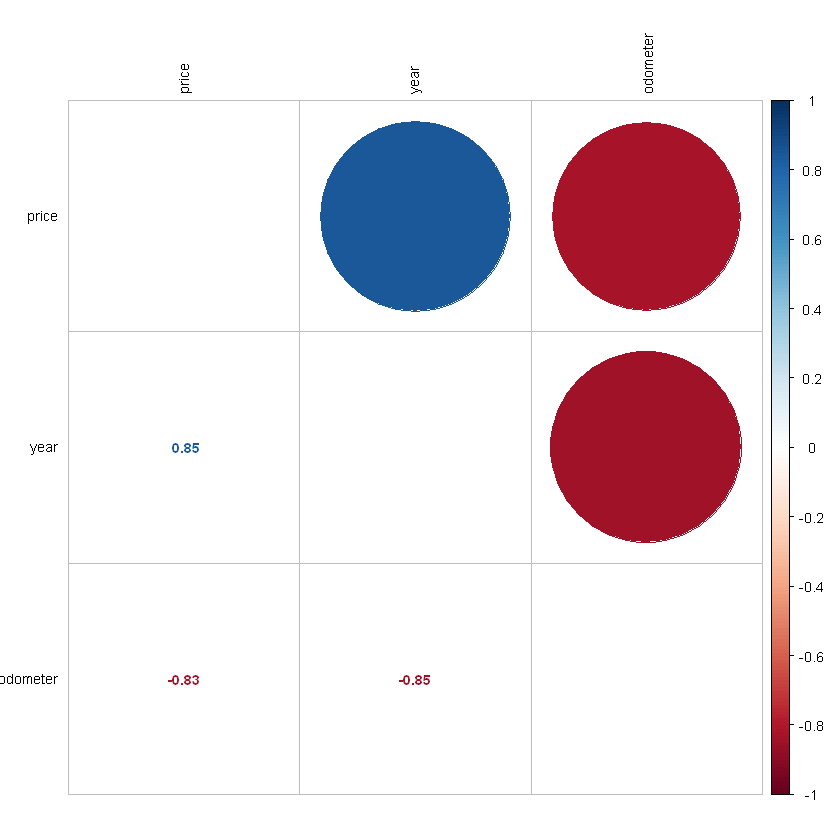

In [48]:
library(corrplot)
#### plot for correlation with colour bar and level #####
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt", tl.cex = 0.7,cl.cex = .7, number.cex=.7)
######

In [49]:
car_data3$year1 <- as.factor(car_data3$year1)### remove NAs from data.
car_data3 <- na.omit(car_data3)
dim(forest_na)
str(car_data3)

[1] 1593   16

'data.frame':	33062 obs. of  20 variables:
 $ price           : int  8560 17074 8526 10952 33964 18070 12019 10860 12997 30216 ...
 $ acquisition_date: Factor w/ 106 levels "01-02-2018","01-03-2018",..: 74 74 74 74 74 74 74 74 74 74 ...
 $ badge           : Factor w/ 205 levels "","(4x4)","(No Badge)",..: 104 11 98 98 155 16 104 98 104 25 ...
 $ body_type       : Factor w/ 9 levels "","Conv","Convertible",..: 5 5 5 5 6 5 6 6 6 5 ...
 $ category        : Factor w/ 6 levels "","Demo","Other",..: 6 6 6 6 6 6 6 5 6 3 ...
 $ colour          : Factor w/ 31 levels "","/cloth","Beige",..: 28 28 5 4 17 4 17 26 28 26 ...
 $ cylinders       : int  4 4 4 4 4 4 4 4 4 4 ...
 $ economy         : num  8.9 6.8 8.9 8.8 10.5 6.8 8.9 8.8 8.9 6.6 ...
 $ fuel            : Factor w/ 3 levels "","Diesel","Unleaded": 3 3 3 3 3 3 3 3 3 3 ...
 $ last_updated    : Factor w/ 104 levels "01-02-2018","01-03-2018",..: 73 73 73 73 73 73 73 73 73 73 ...
 $ litres          : num  2 2 2 2 2.5 2 2 2 2 2 ...
 $ location   

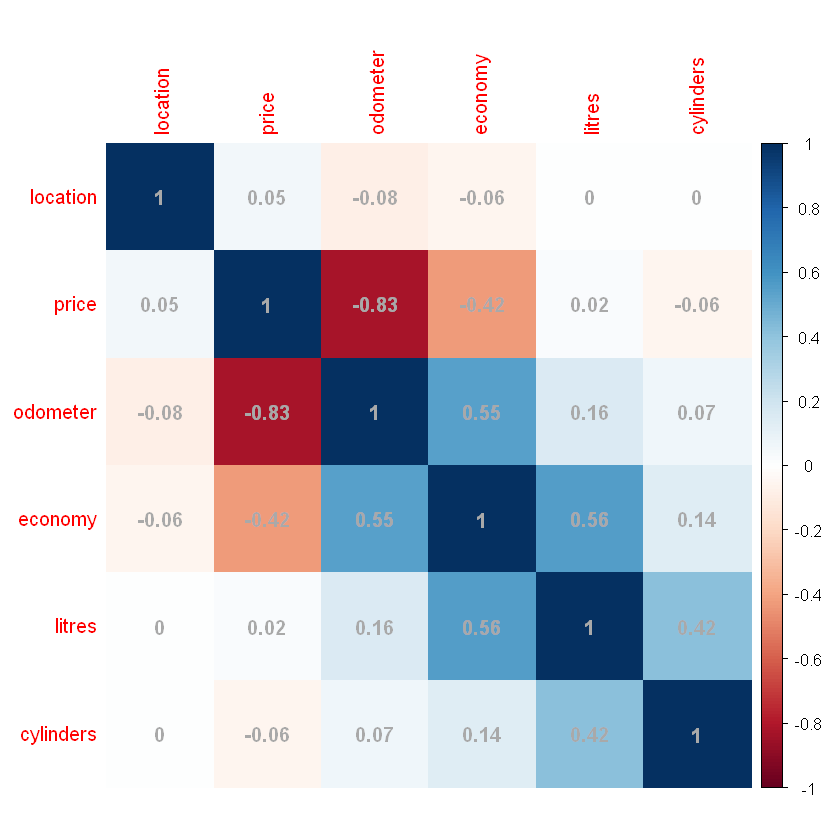

In [50]:
#Corelation plot for all numeric variables.
corrplot(cor(all_numericVariable[1:6]), method = "color", addCoef.col = "darkgray", order = "AOE")

In [53]:
##### split data test and train #####
sample <- sample.int(n = nrow(car_data2), size = floor(.75*nrow(car_data2)), replace = F)
train1 <- car_data2[sample, ]
test1  <- car_data2[-sample, ]

# Implementation of Linear regression model.

In [55]:
###Linear Nodel applies on all numeric attributes.

model_lm = lm(price~., data=train1)
summary(model_lm)
confint(model_lm)


Call:
lm(formula = price ~ ., data = train1)

Residuals:
   Min     1Q Median     3Q    Max 
-11998  -1612   -142   1403  63911 

Coefficients: (3 not defined because of singularities)
                                          Estimate Std. Error  t value Pr(>|t|)
(Intercept)                             -2.642e+06  2.449e+04 -107.912  < 2e-16
acquisition_date01-03-2018              -3.103e+02  1.652e+02   -1.878 0.060374
acquisition_date01-10-2017               1.465e+03  3.760e+02    3.897 9.77e-05
acquisition_date02-02-2018               2.659e+02  2.879e+02    0.924 0.355744
acquisition_date02-10-2017               1.639e+03  2.700e+02    6.070 1.30e-09
acquisition_date03-09-2017               2.086e+03  3.300e+02    6.321 2.64e-10
acquisition_date03-11-2017               6.175e+02  3.069e+02    2.012 0.044241
acquisition_date04-03-2018              -1.553e+03  4.334e+02   -3.583 0.000341
acquisition_date04-09-2017               2.062e+03  2.873e+02    7.177 7.36e-13
acquisition_da

,2.5 %,97.5 %
(Intercept),-2.690475e+06,-2594481.6160
acquisition_date01-03-2018,-6.342097e+02,13.5364
acquisition_date01-10-2017,7.281605e+02,2202.0269
acquisition_date02-02-2018,-2.984672e+02,830.3169
acquisition_date02-10-2017,1.109927e+03,2168.5162
acquisition_date03-09-2017,1.439216e+03,2732.9454
acquisition_date03-11-2017,1.591282e+01,1219.1668
acquisition_date04-03-2018,-2.401947e+03,-703.1089
acquisition_date04-09-2017,1.498751e+03,2625.0530
acquisition_date04-11-2017,-1.672147e+02,1294.0285


#Adjusted R-squared:  0.9011
#R-squared:  0.9014

Warning message in predict.lm(train_all_lm, test1):
"prediction from a rank-deficient fit may be misleading"


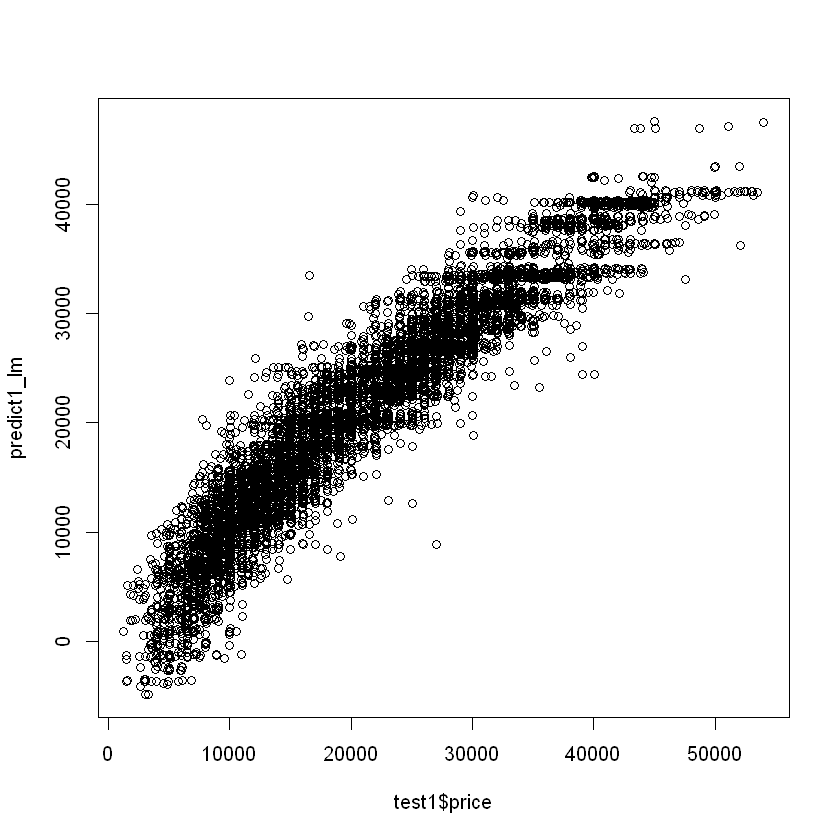

In [62]:
## Prediction analysis.
predict1_lm <- predict(train_all_lm, test1)
plot(test1$price,predict1_lm)

In [68]:
# BP test is conducted to check the linear model functionality.
bptest(model_lm)


	studentized Breusch-Pagan test

data:  model_lm
BP = 2951.9, df = 256, p-value < 2.2e-16


From the above analysis-
Adjusted R-squared:  0.9391 
R-squared:  0.9397
BP = 2951.9
p-value < 2.2e-16